# Some analysis of Training Dataset

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re
import pickle, gzip
from sklearn import svm, metrics
from statistics import mean
from IPython.display import Image
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,f1_score,accuracy_score,matthews_corrcoef
warnings.filterwarnings("ignore")


In [53]:
pd_tr=pd.read_csv('training_set.tsv',sep='\t')
pd_tr

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...,...
1718,P62597,Gallus gallus (Chicken),Metazoa,NO_SP,4,MPVQVLKIIKGKPETQLPSHLQREDLKHLQTGLDHTNKYFQGIVIL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1719,Q7K4M4,Drosophila melanogaster (Fruit fly),Metazoa,NO_SP,4,MSKFLDMLSGSQCVSLEKCGDVVVSTNDCMIALYCHFCRDLFTQLP...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1720,Q14146,Homo sapiens (Human),Metazoa,NO_SP,4,MAAVYSGISLKLKSKTTSWEDKLKLAHFAWISHQCFLPNKEQVLLD...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1721,B2RWS6,Mus musculus (Mouse),Metazoa,NO_SP,4,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


In [54]:
#rename one of the columns
pd_tr.rename(columns={'SP cleavage-site annotation':'SP_cleavage'}, inplace=True)
#check for SP class
df_tr=pd_tr.query("Class == 'SP'")  
df_tr=df_tr['SP_cleavage'].str.count('S')
np.var(df_tr)
np.std(df_tr)
np.median(df_tr)
np.quantile(df_tr,0.25)
np.quantile(df_tr,0.5)
np.quantile(df_tr,0.75)
np.median(df_tr)

21.0

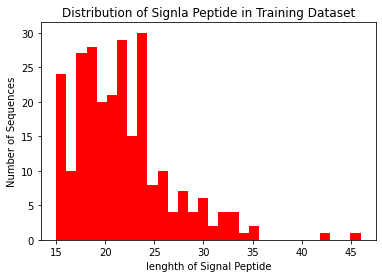

In [55]:
df_tr=pd_tr.query("Class == 'SP'")  #check for SP class
df_tr=df_tr['SP_cleavage'].str.count('S')
plt.hist(df_tr,30,color='red')
plt.xlabel('lenghth of Signal Peptide')
plt.ylabel('Number of Sequences') 
plt.title('Distribution of Signla Peptide in Training Dataset') 
plt.show()

## Comparative amino-acid composition of SPs against some background distribution 
### e.g. amino acid composition of SwissProt available at https://web.expasy.org/docs/relnotes/relstat.html
### Display AA compositions of SP sequences and SwissProt using a combined barplot as shown before

## finding the cleavage site position

In [56]:
cleavage='N'
df_tr=pd_tr.query("Class == 'SP'")  #check for SinglaPeptide class
df_tr["cleavage_position"]=df_tr['SP_cleavage'].str.find(cleavage)
df_tr

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP_cleavage,cleavage_position
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,24
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19
...,...,...,...,...,...,...,...,...
1425,Q9Z0L3,Mus musculus (Mouse),Metazoa,SP,4,MIMLLMVGMLMAPCVGAHALDTPNPQELPPGLSKNINITFFNGVFK...,SSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,17
1426,P20029,Mus musculus (Mouse),Metazoa,SP,4,MMKFTVVAAALLLLGAVRAEEEDKKEDVGTVVGIDLGTTYSCVGVF...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19
1427,P10645,Homo sapiens (Human),Metazoa,SP,4,MRSAAVLALLLCAGQVTALPVNSPMNKGDTEVMKCIVEVISDTLSK...,SSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,18
1428,Q6T6S5,Bitis gabonica (Gaboon adder) (Gaboon viper),Metazoa,SP,4,MSSGGLLLLLGLLTLWAELTPVSGKKRPDFCYLPADTGPCMANFPR...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,24


## Extracting the pattern of Signal_Peptide based on Cleavage_Position

In [57]:
def f(x,y,z):
    return z.str.slice(stop=y)
df_tr['signal_peptide_residue']=df_tr.apply(lambda x: x['Sequence (first 50 N-terminal residues)'][:x['cleavage_position']], axis=1)
df_tr

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP_cleavage,cleavage_position,signal_peptide_residue
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19,MRFLAATFLLLALSTAAQA
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20,MAGKEVIFIMALFIAVESSP
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16,MRVFLAICLSLTVALA
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,24,MASSSAKILLPLSLLFTLLSLSQS
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19,MNYLVMISLALLLMIGVES
...,...,...,...,...,...,...,...,...,...
1425,Q9Z0L3,Mus musculus (Mouse),Metazoa,SP,4,MIMLLMVGMLMAPCVGAHALDTPNPQELPPGLSKNINITFFNGVFK...,SSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,17,MIMLLMVGMLMAPCVGA
1426,P20029,Mus musculus (Mouse),Metazoa,SP,4,MMKFTVVAAALLLLGAVRAEEEDKKEDVGTVVGIDLGTTYSCVGVF...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19,MMKFTVVAAALLLLGAVRA
1427,P10645,Homo sapiens (Human),Metazoa,SP,4,MRSAAVLALLLCAGQVTALPVNSPMNKGDTEVMKCIVEVISDTLSK...,SSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,18,MRSAAVLALLLCAGQVTA
1428,Q6T6S5,Bitis gabonica (Gaboon adder) (Gaboon viper),Metazoa,SP,4,MSSGGLLLLLGLLTLWAELTPVSGKKRPDFCYLPADTGPCMANFPR...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,24,MSSGGLLLLLGLLTLWAELTPVSG


## Calculate the percentage of every aminoacids occurance percentage

In [58]:
aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
ltr=[]
for i in aa:
    ltr.append(((df_tr['signal_peptide_residue'].str.count(i).sum())/df_tr['signal_peptide_residue'].str.len().sum())*100)
ltr

[5.771599507302481,
 13.144465951082173,
 8.868555340489179,
 3.4840753123350345,
 23.191976068977652,
 4.2055252507478444,
 6.563434805560443,
 5.296498328347703,
 1.8476156959352457,
 0.9150096779869786,
 7.267288404011965,
 4.751011789547774,
 2.7274326939996483,
 0.9502023579095548,
 2.07636811543199,
 0.9853950378321309,
 0.9677986978708428,
 1.5308815766320605,
 2.3403132148513106,
 3.114552173147985]

## Bar_Plot (Accurance percentage of each AA in SP zone of Trainig-Dataset)

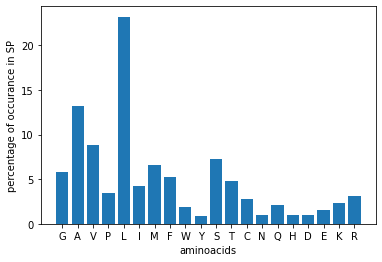

In [59]:
plt.bar(aa,ltr)
plt.xlabel('aminoacids')
plt.ylabel('percentage of occurance in SP')
plt.ylabel('percentage of occurance in SP')
plt.show()

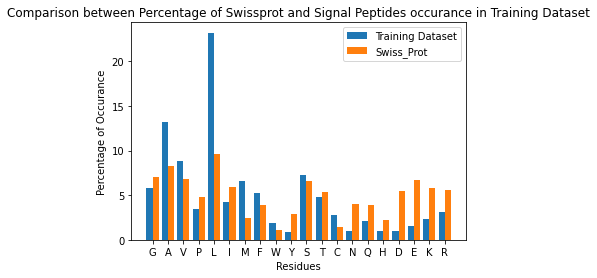

In [60]:
aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
swiss_prot=[7.07,8.25,6.86,4.74,9.65,5.91,2.41,3.86,1.1,2.92,6.64,5.35,1.38,4.06,3.93,2.27,5.46,6.72,5.8,5.53]
X_axis = np.arange(len(aa))
plt.bar(X_axis - 0.2, ltr, 0.4, label ='Training Dataset')
plt.bar(X_axis + 0.2, swiss_prot, 0.4, label = 'Swiss_Prot') 
plt.xticks(X_axis, aa)
plt.xlabel("Residues")
plt.ylabel("Percentage of Occurance")
plt.title("Comparison between Percentage of Swissprot and Signal Peptides occurance in Training Dataset")
plt.legend()
plt.show()

## Taxonomic classification (at kingdom and species levels)


In [61]:
print(df_tr.Kingdom.unique())

['Metazoa' 'Plants' 'Fungi' 'Other']


In [62]:
df_tr.groupby(['Kingdom']).size()

Kingdom
Fungi       14
Metazoa    215
Other        1
Plants      28
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

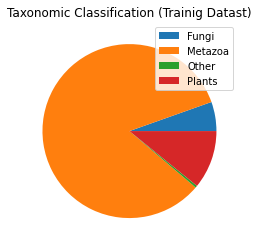

In [63]:
data=[14,215,1,28]
labels=['Fungi','Metazoa','Other','Plants']
p=plt.pie(data)
plt.legend(p[0], labels)
plt.title('Taxonomic Classification (Trainig Datast)')
plt.show

## Sequence logos of SP cleavage sites training dataset
Extract the cleavage-site motifs [-13,+2] and use WebLogo to produce the
sequence logo

In [64]:
df_tr['motif_for_logo']=0*len(df_tr)
def f(x,y,z):
    return z.str.slice(stop=y)
df_tr['motif_for_logo']=df_tr.apply(lambda x: x['Sequence (first 50 N-terminal residues)'][x['cleavage_position']-13:x['cleavage_position']+2], axis=1)
df_tr

,UniProtKB accession,Taxa,Kingdom,Class,Cross-validation fold,Sequence (first 50 N-terminal residues),SP_cleavage,cleavage_position,signal_peptide_residue,motif_for_logo
0,P61916,Homo sapiens (Human),Metazoa,SP,0,MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQP...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19,MRFLAATFLLLALSTAAQA,TFLLLALSTAAQAEP
1,Q7M3V1,Chelonus sp. nr. curvimaculatus (Parasitic wasp),Metazoa,SP,0,MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECST...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20,MAGKEVIFIMALFIAVESSP,FIMALFIAVESSPIF
2,Q08738,Bombyx mori (Silk moth),Metazoa,SP,0,MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVA...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16,MRVFLAICLSLTVALA,FLAICLSLTVALAAE
3,Q41350,Solanum lycopersicum (Tomato) (Lycopersicon es...,Plants,SP,0,MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQ...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,24,MASSSAKILLPLSLLFTLLSLSQS,LSLLFTLLSLSQSTN
4,Q86SE1,Androctonus amoreuxi (African fattail scorpion...,Metazoa,SP,0,MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKEN...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19,MNYLVMISLALLLMIGVES,ISLALLLMIGVESVR
...,...,...,...,...,...,...,...,...,...,...
1425,Q9Z0L3,Mus musculus (Mouse),Metazoa,SP,4,MIMLLMVGMLMAPCVGAHALDTPNPQELPPGLSKNINITFFNGVFK...,SSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,17,MIMLLMVGMLMAPCVGA,LMVGMLMAPCVGAHA
1426,P20029,Mus musculus (Mouse),Metazoa,SP,4,MMKFTVVAAALLLLGAVRAEEEDKKEDVGTVVGIDLGTTYSCVGVF...,SSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNN...,19,MMKFTVVAAALLLLGAVRA,VAAALLLLGAVRAEE
1427,P10645,Homo sapiens (Human),Metazoa,SP,4,MRSAAVLALLLCAGQVTALPVNSPMNKGDTEVMKCIVEVISDTLSK...,SSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,18,MRSAAVLALLLCAGQVTA,VLALLLCAGQVTALP
1428,Q6T6S5,Bitis gabonica (Gaboon adder) (Gaboon viper),Metazoa,SP,4,MSSGGLLLLLGLLTLWAELTPVSGKKRPDFCYLPADTGPCMANFPR...,SSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNN...,24,MSSGGLLLLLGLLTLWAELTPVSG,LLTLWAELTPVSGKK


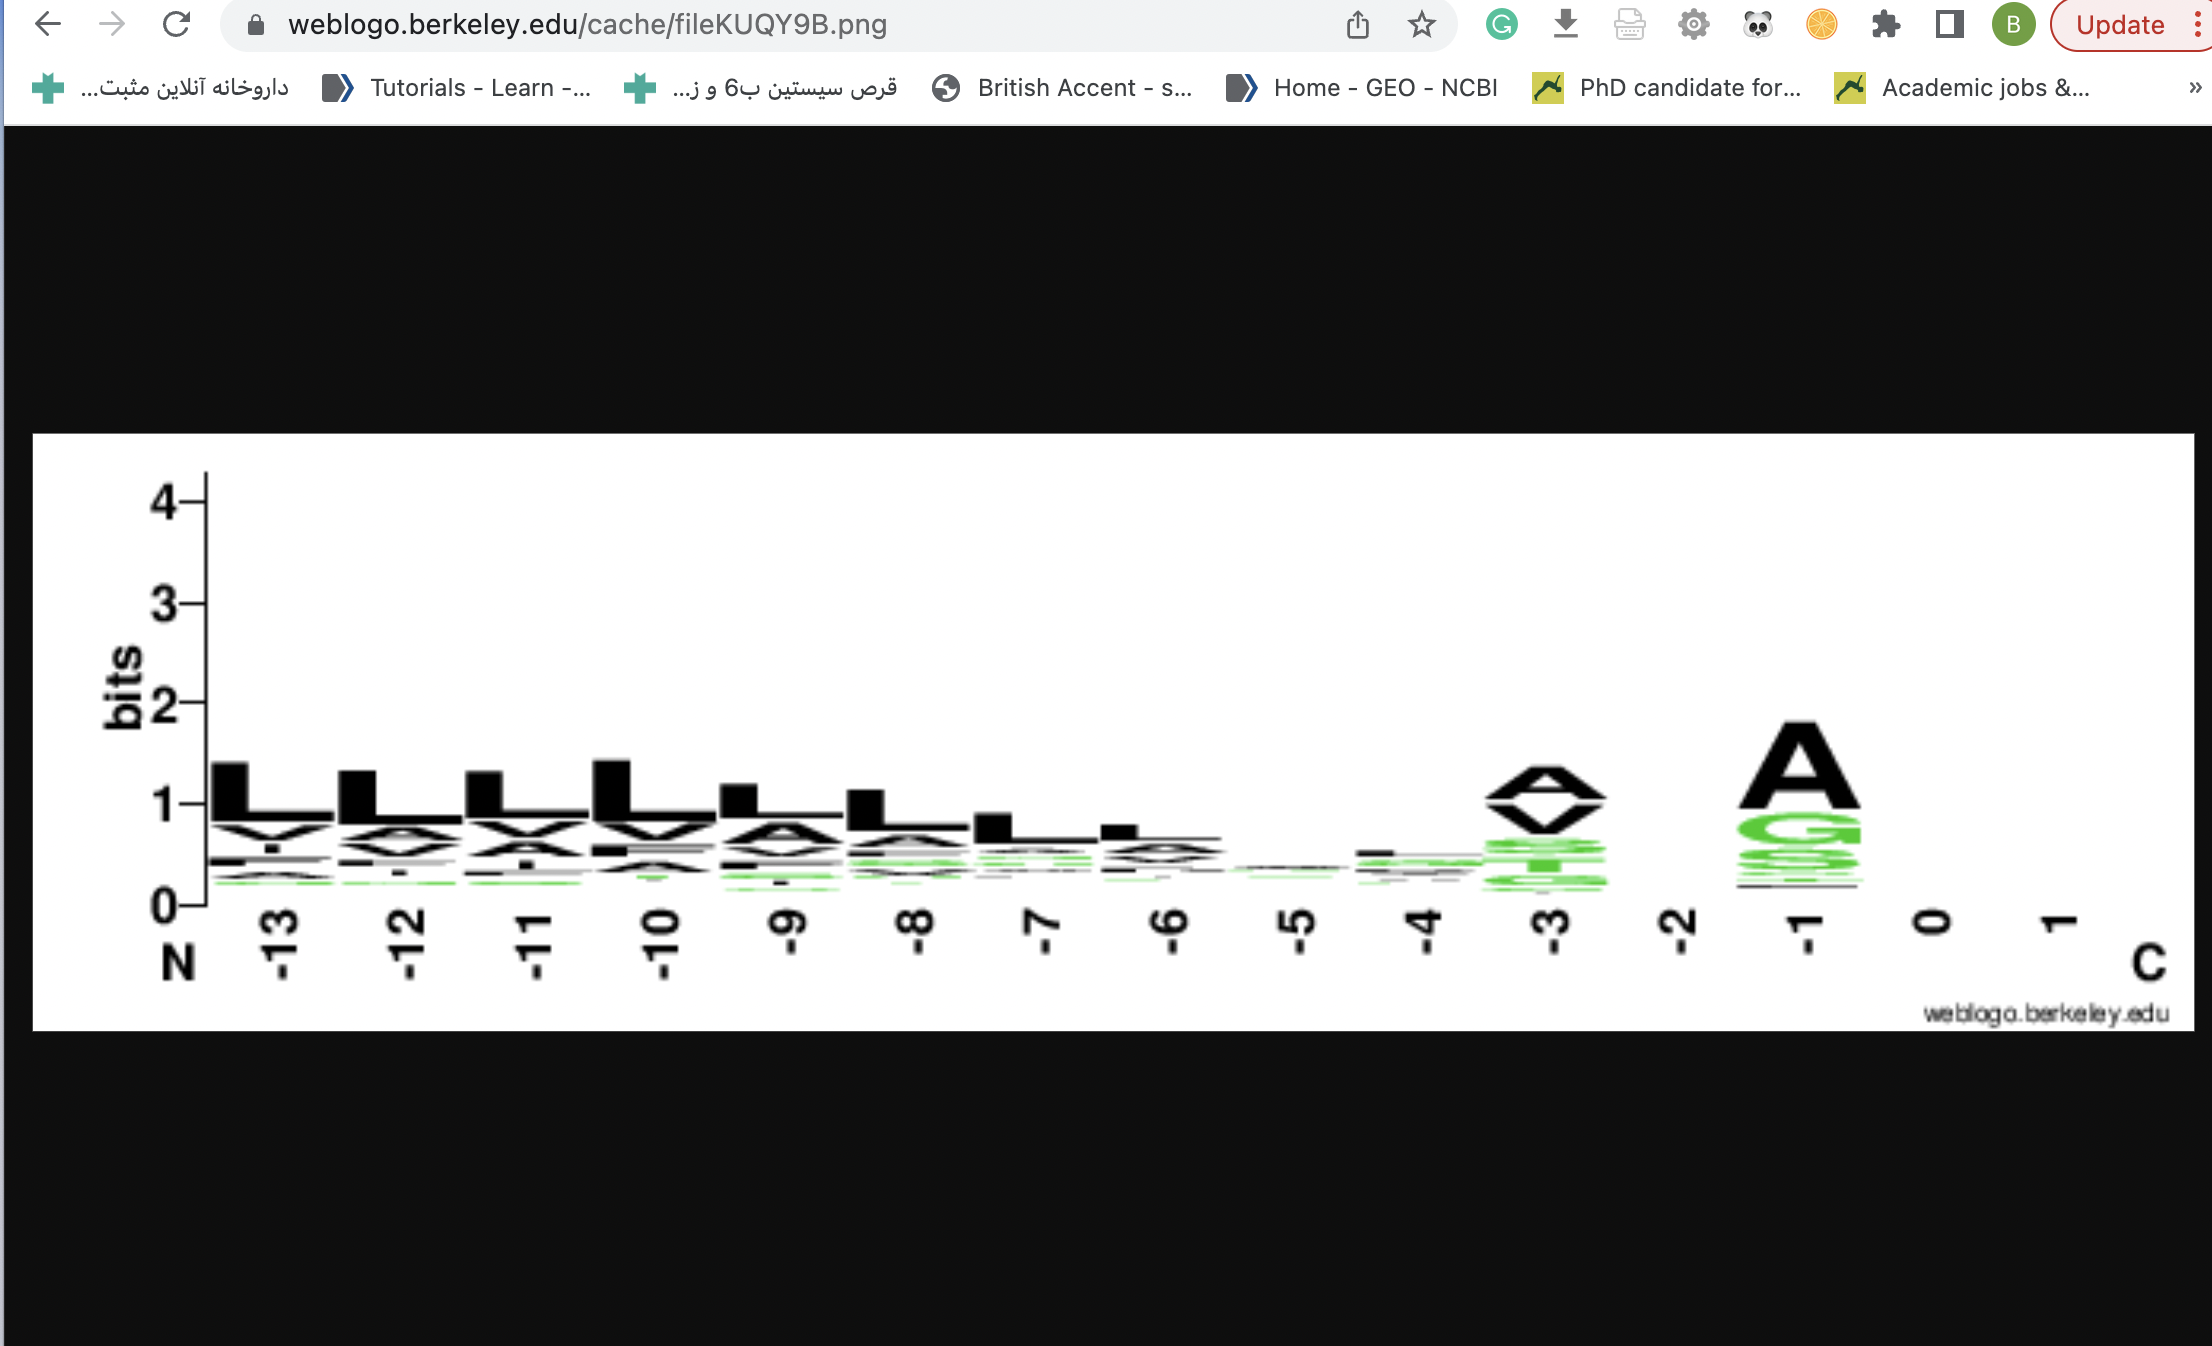

In [65]:

Image(filename='result.png') 

# Some analysis of Benchmark Dataset

## <div class="alert-warning"><b><span style="font-size:13px;">Distribution of SP length in Benchmark Dataset </span> <b><br>
 <span style="font-size:13 px;">Use either histograms, density or boxplot </span>
</div>

In [66]:
pd_BM=pd.read_csv('benchmark_set.tsv',sep='\t')
pd_BM

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP cleavage-site annotation
0,Q8TF40,Homo sapiens (Human),Metazoa,NO_SP,MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
1,Q1ENB6,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
2,Q9BZS1,Homo sapiens (Human),Metazoa,NO_SP,MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
3,F4K2A1,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
4,Q9SZL8,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
...,...,...,...,...,...,...
7451,O74327,Homo sapiens (Human),Metazoa,NO_SP,MSGYSPLSSGPADVHIGKAGFFSSVINLANTILGAGILSLPNAFTK...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7452,Q9UM00,Arabidopsis thaliana (Mouse-ear cress),Plants,NO_SP,MSTMFADTLLIVFISVCTALLAEGITWVLVYRTDKYKRLKAEVEKQ...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7453,Q93Y07,Homo sapiens (Human),Metazoa,NO_SP,MELFALLIKVAGLLATVTVGANVVSYSRFRRQNLAKFRSPIDESKE...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
7454,Q86TL2,Mus musculus (Mouse),Metazoa,NO_SP,MQGPAGNASRGLPGGPPSTVASGAGRCESGALMHSFGIFLQGLLGV...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...


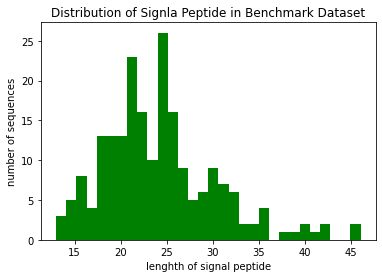

In [67]:
pd_BM.rename(columns={'SP cleavage-site annotation':'SP_cleavage'}, inplace=True)
df_BM=pd_BM.query("Class == 'SP'")  #check for SP class
df_BM=df_BM['SP_cleavage'].str.count('S')
plt.hist(df_BM,30,density=False,color='green')
plt.title('Distribution of Signla Peptide in Benchmark Dataset') 
plt.xlabel('lenghth of signal peptide')
plt.ylabel('number of sequences') 
plt.show()

## finding the Cleavage-Site position Benchmark-Dataset

In [68]:

cleavage='N'
df_BM=pd_BM.query("Class == 'SP'")  #check for SP class  #check for SinglaPeptide class
df_BM['SP_cleavage'].str.find(cleavage)
df_BM["cleavage_position"]=df_BM['SP_cleavage'].str.find(cleavage)
df_BM

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP_cleavage,cleavage_position
6929,A1X158,Rattus norvegicus (Rat),Metazoa,SP,MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKVHPPAW...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20
6930,D3Z9M3,Rattus norvegicus (Rat),Metazoa,SP,MLVILLMVVVLALSSAQDPNRDFVVSSQDVRERQPSSQQGTVGGQS...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16
6931,P42264,Patiria pectinifera (Starfish) (Asterina pecti...,Metazoa,SP,MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRGMPHVIRIGGIFEYAD...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNN...,31
6932,C9K4X8,Aspergillus oryzae (strain ATCC 42149 / RIB 40...,Fungi,SP,MTSNNRHLFQATCLVLLLLHAAFHGGALGEKYCDDDFHMAVFRTCA...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNN...,29
6933,Q2U4L7,Homo sapiens (Human),Metazoa,SP,MMHFLSFCLSVASLVSYAGAASTFSPARPPALPLAVKSPYLSTWLS...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20
...,...,...,...,...,...,...,...
7133,P24821,Aureobasidium pullulans (Black yeast) (Pullula...,Fungi,SP,MGAMTQLLAGVFLAFLALATEGGVLKKVIRHKRQSGVNATLPEENQ...,SSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNN...,22
7134,Q2PGV8,Rattus norvegicus (Rat),Metazoa,SP,MHFSTITAALALLGLGAATPTDYSTSSYSKNQGLAQAWTSKGRQYI...,SSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNN...,26
7135,Q99MA2,Candida albicans (strain SC5314 / ATCC MYA-287...,Fungi,SP,MAQAYWQCYPWLVLLCACAWSYPGPESLGREDVRDCSTNPPRLPVT...,SSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNN...,22
7136,Q59Y31,Gallus gallus (Chicken),Metazoa,SP,MKVSTIFAAASALFAATTTLAQDVACLVDNQQVAVVDLDTGVCPFT...,SSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNN...,21


## <div class="alert-success"><b><span style="font-size:13px;">Extracting the pattern of signal peptide in Benchmark Dataset </span> <b>

In [69]:
def f(x,y,z):
    return z.str.slice(stop=y)
df_BM['signal_peptide_residue']=df_BM.apply(lambda x: x['Sequence (first 50 N-terminal residues)'][:x['cleavage_position']], axis=1)
df_BM

,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP_cleavage,cleavage_position,signal_peptide_residue
6929,A1X158,Rattus norvegicus (Rat),Metazoa,SP,MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKVHPPAW...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20,MARNMNILTLFAVLIGSASA
6930,D3Z9M3,Rattus norvegicus (Rat),Metazoa,SP,MLVILLMVVVLALSSAQDPNRDFVVSSQDVRERQPSSQQGTVGGQS...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16,MLVILLMVVVLALSSA
6931,P42264,Patiria pectinifera (Starfish) (Asterina pecti...,Metazoa,SP,MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRGMPHVIRIGGIFEYAD...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNN...,31,MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRG
6932,C9K4X8,Aspergillus oryzae (strain ATCC 42149 / RIB 40...,Fungi,SP,MTSNNRHLFQATCLVLLLLHAAFHGGALGEKYCDDDFHMAVFRTCA...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNN...,29,MTSNNRHLFQATCLVLLLLHAAFHGGALG
6933,Q2U4L7,Homo sapiens (Human),Metazoa,SP,MMHFLSFCLSVASLVSYAGAASTFSPARPPALPLAVKSPYLSTWLS...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20,MMHFLSFCLSVASLVSYAGA
...,...,...,...,...,...,...,...,...
7133,P24821,Aureobasidium pullulans (Black yeast) (Pullula...,Fungi,SP,MGAMTQLLAGVFLAFLALATEGGVLKKVIRHKRQSGVNATLPEENQ...,SSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNN...,22,MGAMTQLLAGVFLAFLALATEG
7134,Q2PGV8,Rattus norvegicus (Rat),Metazoa,SP,MHFSTITAALALLGLGAATPTDYSTSSYSKNQGLAQAWTSKGRQYI...,SSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNN...,26,MHFSTITAALALLGLGAATPTDYSTS
7135,Q99MA2,Candida albicans (strain SC5314 / ATCC MYA-287...,Fungi,SP,MAQAYWQCYPWLVLLCACAWSYPGPESLGREDVRDCSTNPPRLPVT...,SSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNN...,22,MAQAYWQCYPWLVLLCACAWSY
7136,Q59Y31,Gallus gallus (Chicken),Metazoa,SP,MKVSTIFAAASALFAATTTLAQDVACLVDNQQVAVVDLDTGVCPFT...,SSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNN...,21,MKVSTIFAAASALFAATTTLA



<div class="alert-success">
<b><span style="font-size:26px;">Calculate the percentage of every aminoacids occurance percentage in Benchmark Dataset</span> <b>

In [70]:
aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
BM=[]
for i in aa:
    BM.append(((df_BM['signal_peptide_residue'].str.count(i).sum())/df_BM['signal_peptide_residue'].str.len().sum())*100)
BM

[6.149891239865533,
 13.881748071979436,
 8.068024520466679,
 4.132885109748862,
 20.506228989519478,
 4.409729088392327,
 5.991694680640696,
 4.805220486454419,
 2.036780700019775,
 1.0282776349614395,
 7.494561993276647,
 4.963417045679257,
 3.0848329048843186,
 1.1271504844769626,
 2.0763298398259837,
 1.6215147320545777,
 1.1271504844769626,
 1.3248961835080086,
 2.036780700019775,
 4.132885109748862]


<div class="alert-success">
<b><span style="font-size:26px;">Plot the bar plot(swissprot and signal peptide Benchmark Dataset</span> <b>

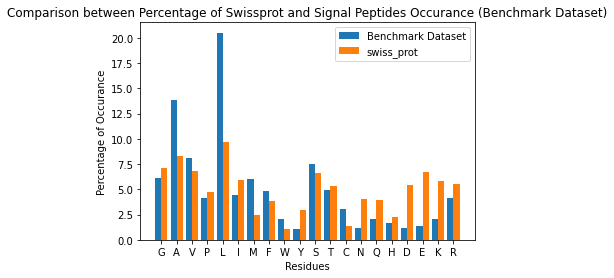

In [71]:
aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
swiss_prot=[7.07,8.25,6.86,4.74,9.65,5.91,2.41,3.86,1.1,2.92,6.64,5.35,1.38,4.06,3.93,2.27,5.46,6.72,5.8,5.53]
plt.bar(X_axis - 0.2, BM, 0.4, label ='Benchmark Dataset')
plt.bar(X_axis + 0.2, swiss_prot, 0.4, label = 'swiss_prot') 
plt.xticks(X_axis, aa)
plt.xlabel("Residues")
plt.ylabel("Percentage of Occurance")
plt.title("Comparison between Percentage of Swissprot and Signal Peptides Occurance (Benchmark Dataset)")
plt.legend()
plt.show()


<div class="alert-success">
<b><span style="font-size:26px;">Taxonomic classification (at kingdom and species levels)</span> <b><br><br>
<b><span style="font-size:26px;">Use either a pie chart or a box plot</span> <b>

In [72]:
df_BM.groupby(['Kingdom']).size()

Kingdom
Fungi       20
Metazoa    169
Other        3
Plants      17
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

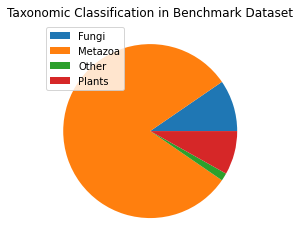

In [73]:
data=[20,169,3,17]
labels=['Fungi','Metazoa','Other','Plants']
p=plt.pie(data)
plt.legend(p[0], labels)
plt.title('Taxonomic Classification in Benchmark Dataset' )
plt.show


<div class="alert-success">
<b><span style="font-size:26px;">Sequence logos of SP cleavage sites</span> <b><br><br>
<b><span style="font-size:26px;">Extract the cleavage-site motifs [-13,+2] and use WebLogo to produce the
sequence logo</span> <b>

### adding new column with the name of motif for logo in Benchmark Dataset

In [74]:

def f(x,y,z):
    return z.str.slice(stop=y)
df_BM['motif_for_logo']=df_BM.apply(lambda x: x['Sequence (first 50 N-terminal residues)'][x['cleavage_position']-13:x['cleavage_position']+2], axis=1)
df_BM


,UniProtKB accession,Taxa,Kingdom,Class,Sequence (first 50 N-terminal residues),SP_cleavage,cleavage_position,signal_peptide_residue,motif_for_logo
6929,A1X158,Rattus norvegicus (Rat),Metazoa,SP,MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKVHPPAW...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20,MARNMNILTLFAVLIGSASA,LTLFAVLIGSASAVY
6930,D3Z9M3,Rattus norvegicus (Rat),Metazoa,SP,MLVILLMVVVLALSSAQDPNRDFVVSSQDVRERQPSSQQGTVGGQS...,SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,16,MLVILLMVVVLALSSA,ILLMVVVLALSSAQD
6931,P42264,Patiria pectinifera (Starfish) (Asterina pecti...,Metazoa,SP,MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRGMPHVIRIGGIFEYAD...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNN...,31,MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRG,FLVCAFWIPDSRGMP
6932,C9K4X8,Aspergillus oryzae (strain ATCC 42149 / RIB 40...,Fungi,SP,MTSNNRHLFQATCLVLLLLHAAFHGGALGEKYCDDDFHMAVFRTCA...,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNN...,29,MTSNNRHLFQATCLVLLLLHAAFHGGALG,LLLHAAFHGGALGEK
6933,Q2U4L7,Homo sapiens (Human),Metazoa,SP,MMHFLSFCLSVASLVSYAGAASTFSPARPPALPLAVKSPYLSTWLS...,SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...,20,MMHFLSFCLSVASLVSYAGA,CLSVASLVSYAGAAS
...,...,...,...,...,...,...,...,...,...
7133,P24821,Aureobasidium pullulans (Black yeast) (Pullula...,Fungi,SP,MGAMTQLLAGVFLAFLALATEGGVLKKVIRHKRQSGVNATLPEENQ...,SSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNN...,22,MGAMTQLLAGVFLAFLALATEG,GVFLAFLALATEGGV
7134,Q2PGV8,Rattus norvegicus (Rat),Metazoa,SP,MHFSTITAALALLGLGAATPTDYSTSSYSKNQGLAQAWTSKGRQYI...,SSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNN...,26,MHFSTITAALALLGLGAATPTDYSTS,GLGAATPTDYSTSSY
7135,Q99MA2,Candida albicans (strain SC5314 / ATCC MYA-287...,Fungi,SP,MAQAYWQCYPWLVLLCACAWSYPGPESLGREDVRDCSTNPPRLPVT...,SSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNN...,22,MAQAYWQCYPWLVLLCACAWSY,PWLVLLCACAWSYPG
7136,Q59Y31,Gallus gallus (Chicken),Metazoa,SP,MKVSTIFAAASALFAATTTLAQDVACLVDNQQVAVVDLDTGVCPFT...,SSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNN...,21,MKVSTIFAAASALFAATTTLA,AASALFAATTTLAQD


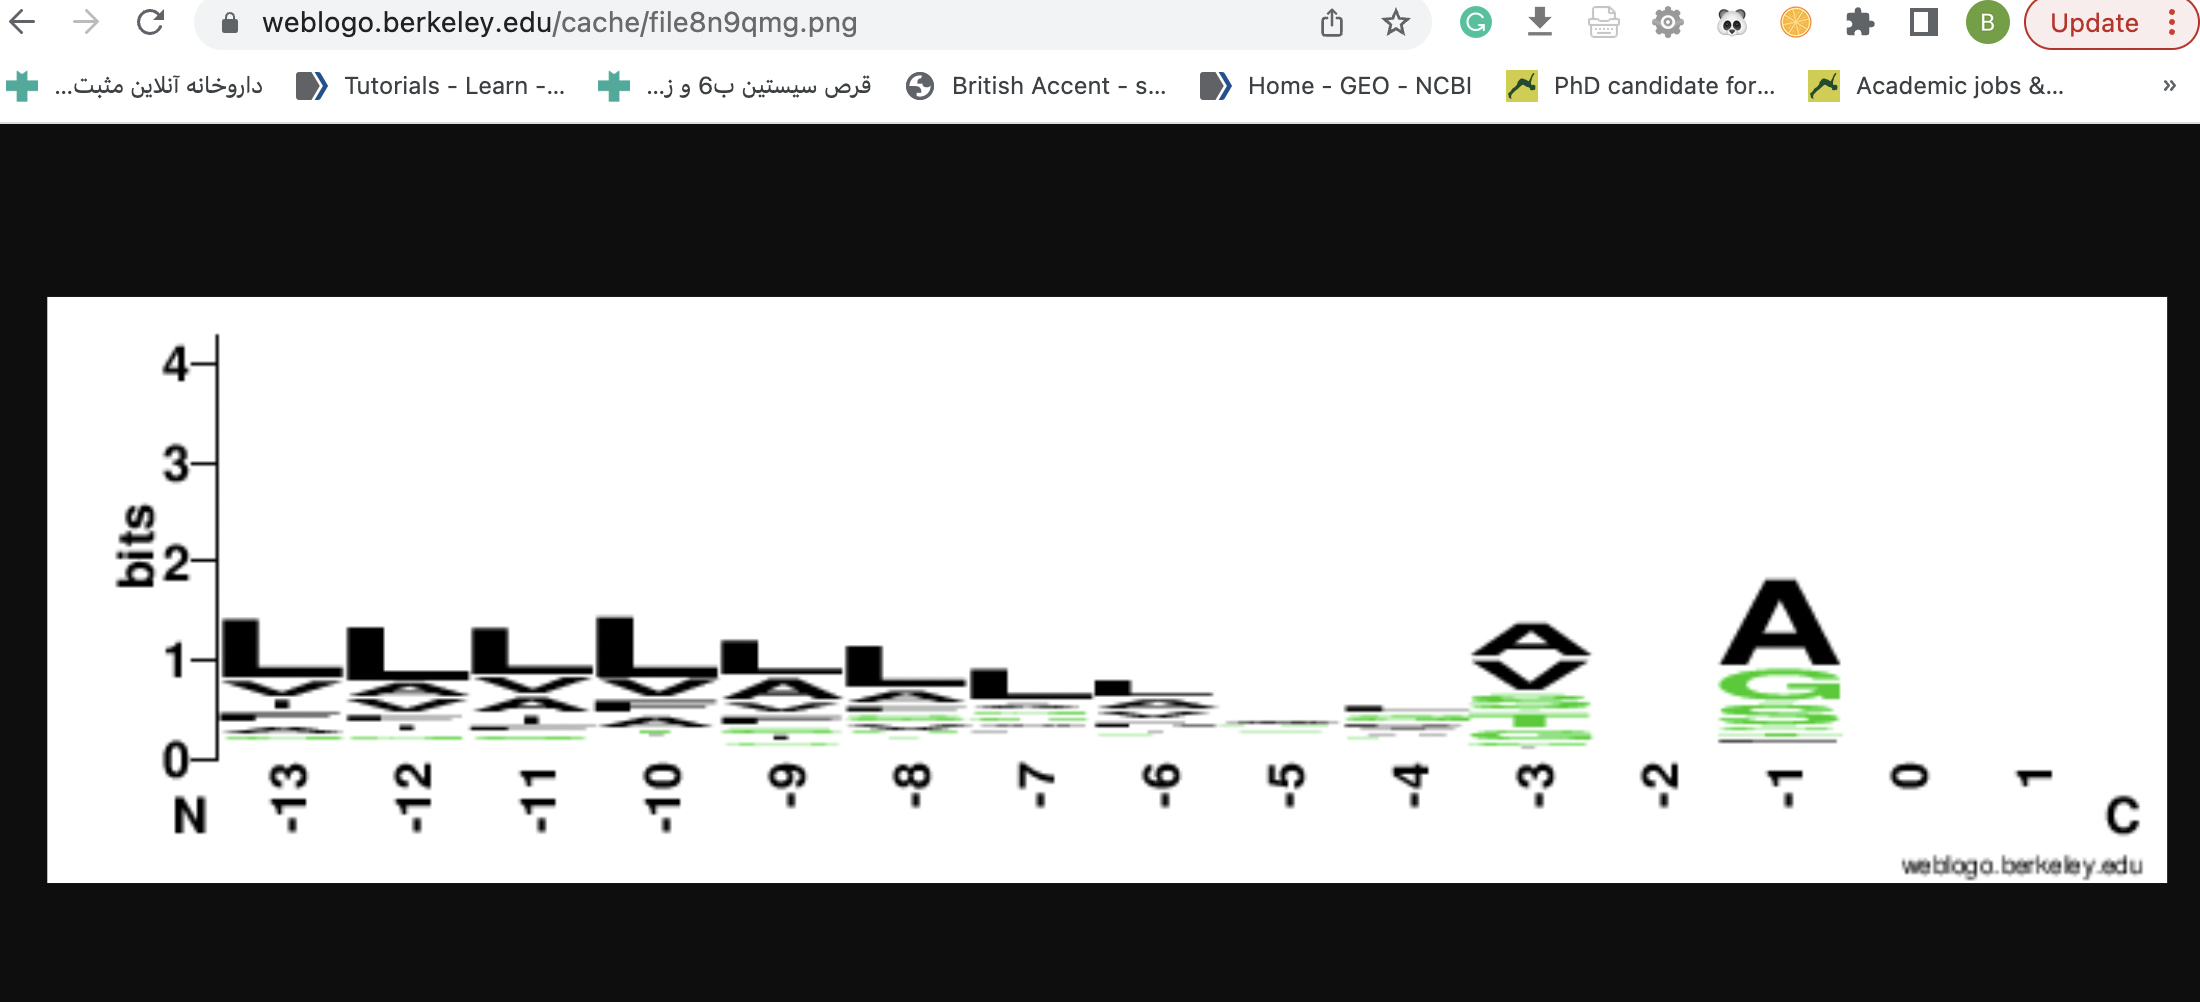

In [75]:

Image(filename='Benchmark_result.png') 

# vonHeijne Method

## Training

### step1: Training cleavage site context based on training dataset(
<!-- dividie training dataset to 5 set and then training 4 of them and test on the fifith set) -->

In [77]:
RUNS=[0,1,2,3,4]
dfs=[]
aa=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
for R in RUNS:
    
    training=[]
    for location in range(len(df_tr['motif_for_logo'].iloc[0])):
        for j in range(len(aa)):
            summ=0
            for i in range(len(df_tr['motif_for_logo'])):
                if df_tr['Cross-validation fold'].iloc[i]!=RUNS[R]:
                     summ=summ+(df_tr['motif_for_logo'].iloc[i][location].count(aa[j]))
            training.append(summ+1)
    dfs.append((pd.DataFrame(np.array(training).reshape(15,20),columns=aa)))
for i in range(len(dfs)):
    display(dfs[i].T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,17,28,27,20,41,29,23,33,37,22,55,13,101,24,12
R,2,2,1,1,1,1,5,1,5,7,2,17,3,10,11
N,1,2,1,4,2,5,2,2,5,2,3,3,1,8,9
D,1,1,1,1,3,1,1,5,14,3,2,11,3,21,13
C,6,7,6,6,11,12,18,3,3,7,9,4,10,5,8
Q,2,2,2,2,2,4,5,4,11,7,2,23,3,12,10
E,1,1,1,2,1,2,6,1,7,5,2,28,2,10,15
G,7,5,7,9,8,6,12,10,26,36,19,10,42,19,12
H,1,4,2,1,1,1,3,1,7,4,2,10,1,5,9
I,18,15,21,6,17,6,8,13,6,5,6,6,2,5,10


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,16,27,28,20,37,28,19,34,35,19,58,17,98,29,12
R,2,2,1,1,1,1,6,2,8,10,2,15,1,10,13
N,1,1,1,4,2,5,2,2,5,3,2,4,1,8,7
D,2,1,1,1,3,1,1,4,16,3,2,10,4,20,14
C,6,6,6,5,11,11,15,11,3,7,12,4,9,4,4
Q,3,2,2,3,2,3,5,3,15,10,2,21,4,10,11
E,1,1,1,2,2,2,7,1,8,4,1,20,1,12,17
G,6,5,7,6,7,8,7,8,27,25,24,7,40,16,13
H,1,2,2,1,1,1,4,2,7,3,2,11,1,6,7
I,22,12,15,9,14,6,9,18,4,5,8,8,3,5,11


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,14,30,31,20,45,29,17,34,37,21,51,18,102,31,14
R,1,2,1,1,1,1,5,2,7,7,2,14,3,9,14
N,1,2,1,3,3,3,2,1,4,2,3,4,1,9,9
D,2,1,1,1,3,1,1,5,11,3,2,11,4,17,14
C,8,4,6,5,9,12,15,11,1,8,13,5,8,4,8
Q,3,2,1,3,2,4,3,2,14,7,2,24,4,10,8
E,1,1,1,2,2,3,7,1,5,4,2,25,2,12,14
G,7,4,5,7,6,7,11,11,27,38,19,10,41,17,12
H,1,4,2,1,1,1,3,2,5,5,2,9,1,3,10
I,22,14,19,10,14,8,11,15,6,6,9,6,2,5,6


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,13,23,30,22,39,27,19,35,35,21,52,18,105,28,10
R,2,1,1,1,1,1,5,2,7,8,2,17,3,11,16
N,1,2,1,4,3,3,1,2,5,3,2,3,1,7,8
D,2,1,1,1,3,1,1,4,10,1,2,13,3,18,18
C,7,7,6,4,12,12,12,11,3,7,9,3,9,5,8
Q,2,1,2,3,2,3,5,4,10,10,2,19,2,12,8
E,1,1,1,1,2,3,6,1,6,6,2,28,2,12,15
G,6,6,6,7,5,6,11,9,27,35,22,9,42,20,13
H,1,4,1,1,1,1,3,2,8,5,1,10,1,6,7
I,22,17,21,8,11,6,9,12,7,4,8,5,3,7,10


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,17,25,29,23,47,28,23,29,37,18,57,15,103,33,9
R,2,2,1,1,1,1,4,2,6,9,1,14,3,9,15
N,1,2,1,2,3,5,2,2,6,3,3,3,1,9,8
D,2,1,1,1,1,1,1,3,14,3,1,12,3,21,14
C,6,5,5,5,10,10,17,9,3,4,10,5,9,3,9
Q,3,2,2,2,1,3,3,4,11,7,1,18,4,13,8
E,1,1,1,2,2,3,7,1,7,6,2,28,2,11,16
G,7,5,4,8,7,6,12,11,18,39,21,9,36,17,11
H,1,3,2,1,1,1,4,2,6,4,2,9,1,5,8
I,17,15,21,8,17,7,8,15,6,5,10,8,3,7,8


### Step 2: Creating PSPM matrix


In [78]:
#TR-Matrix/(Number of sequences+20)
for df in dfs:
    print(f'it is training matrix for run:{ i for i in range(len(dfs))}')
#     runs_dataframe[m].transpose()
    display((df/(len(df_tr)-52+20)).T)

it is training matrix for run:<generator object <genexpr> at 0x14c4c91c0>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.075221,0.123894,0.119469,0.088496,0.181416,0.128319,0.101770,0.146018,0.163717,0.097345,0.243363,0.057522,0.446903,0.106195,0.053097
R,0.008850,0.008850,0.004425,0.004425,0.004425,0.004425,0.022124,0.004425,0.022124,0.030973,0.008850,0.075221,0.013274,0.044248,0.048673
N,0.004425,0.008850,0.004425,0.017699,0.008850,0.022124,0.008850,0.008850,0.022124,0.008850,0.013274,0.013274,0.004425,0.035398,0.039823
D,0.004425,0.004425,0.004425,0.004425,0.013274,0.004425,0.004425,0.022124,0.061947,0.013274,0.008850,0.048673,0.013274,0.092920,0.057522
C,0.026549,0.030973,0.026549,0.026549,0.048673,0.053097,0.079646,0.013274,0.013274,0.030973,0.039823,0.017699,0.044248,0.022124,0.035398
Q,0.008850,0.008850,0.008850,0.008850,0.008850,0.017699,0.022124,0.017699,0.048673,0.030973,0.008850,0.101770,0.013274,0.053097,0.044248
E,0.004425,0.004425,0.004425,0.008850,0.004425,0.008850,0.026549,0.004425,0.030973,0.022124,0.008850,0.123894,0.008850,0.044248,0.066372
G,0.030973,0.022124,0.030973,0.039823,0.035398,0.026549,0.053097,0.044248,0.115044,0.159292,0.084071,0.044248,0.185841,0.084071,0.053097
H,0.004425,0.017699,0.008850,0.004425,0.004425,0.004425,0.013274,0.004425,0.030973,0.017699,0.008850,0.044248,0.004425,0.022124,0.039823
I,0.079646,0.066372,0.092920,0.026549,0.075221,0.026549,0.035398,0.057522,0.026549,0.022124,0.026549,0.026549,0.008850,0.022124,0.044248


it is training matrix for run:<generator object <genexpr> at 0x14c4c9fc0>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.070796,0.119469,0.123894,0.088496,0.163717,0.123894,0.084071,0.150442,0.154867,0.084071,0.256637,0.075221,0.433628,0.128319,0.053097
R,0.008850,0.008850,0.004425,0.004425,0.004425,0.004425,0.026549,0.008850,0.035398,0.044248,0.008850,0.066372,0.004425,0.044248,0.057522
N,0.004425,0.004425,0.004425,0.017699,0.008850,0.022124,0.008850,0.008850,0.022124,0.013274,0.008850,0.017699,0.004425,0.035398,0.030973
D,0.008850,0.004425,0.004425,0.004425,0.013274,0.004425,0.004425,0.017699,0.070796,0.013274,0.008850,0.044248,0.017699,0.088496,0.061947
C,0.026549,0.026549,0.026549,0.022124,0.048673,0.048673,0.066372,0.048673,0.013274,0.030973,0.053097,0.017699,0.039823,0.017699,0.017699
Q,0.013274,0.008850,0.008850,0.013274,0.008850,0.013274,0.022124,0.013274,0.066372,0.044248,0.008850,0.092920,0.017699,0.044248,0.048673
E,0.004425,0.004425,0.004425,0.008850,0.008850,0.008850,0.030973,0.004425,0.035398,0.017699,0.004425,0.088496,0.004425,0.053097,0.075221
G,0.026549,0.022124,0.030973,0.026549,0.030973,0.035398,0.030973,0.035398,0.119469,0.110619,0.106195,0.030973,0.176991,0.070796,0.057522
H,0.004425,0.008850,0.008850,0.004425,0.004425,0.004425,0.017699,0.008850,0.030973,0.013274,0.008850,0.048673,0.004425,0.026549,0.030973
I,0.097345,0.053097,0.066372,0.039823,0.061947,0.026549,0.039823,0.079646,0.017699,0.022124,0.035398,0.035398,0.013274,0.022124,0.048673


it is training matrix for run:<generator object <genexpr> at 0x14c4c9fc0>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.061947,0.132743,0.137168,0.088496,0.199115,0.128319,0.075221,0.150442,0.163717,0.092920,0.225664,0.079646,0.451327,0.137168,0.061947
R,0.004425,0.008850,0.004425,0.004425,0.004425,0.004425,0.022124,0.008850,0.030973,0.030973,0.008850,0.061947,0.013274,0.039823,0.061947
N,0.004425,0.008850,0.004425,0.013274,0.013274,0.013274,0.008850,0.004425,0.017699,0.008850,0.013274,0.017699,0.004425,0.039823,0.039823
D,0.008850,0.004425,0.004425,0.004425,0.013274,0.004425,0.004425,0.022124,0.048673,0.013274,0.008850,0.048673,0.017699,0.075221,0.061947
C,0.035398,0.017699,0.026549,0.022124,0.039823,0.053097,0.066372,0.048673,0.004425,0.035398,0.057522,0.022124,0.035398,0.017699,0.035398
Q,0.013274,0.008850,0.004425,0.013274,0.008850,0.017699,0.013274,0.008850,0.061947,0.030973,0.008850,0.106195,0.017699,0.044248,0.035398
E,0.004425,0.004425,0.004425,0.008850,0.008850,0.013274,0.030973,0.004425,0.022124,0.017699,0.008850,0.110619,0.008850,0.053097,0.061947
G,0.030973,0.017699,0.022124,0.030973,0.026549,0.030973,0.048673,0.048673,0.119469,0.168142,0.084071,0.044248,0.181416,0.075221,0.053097
H,0.004425,0.017699,0.008850,0.004425,0.004425,0.004425,0.013274,0.008850,0.022124,0.022124,0.008850,0.039823,0.004425,0.013274,0.044248
I,0.097345,0.061947,0.084071,0.044248,0.061947,0.035398,0.048673,0.066372,0.026549,0.026549,0.039823,0.026549,0.008850,0.022124,0.026549


it is training matrix for run:<generator object <genexpr> at 0x14c4c9fc0>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.057522,0.101770,0.132743,0.097345,0.172566,0.119469,0.084071,0.154867,0.154867,0.092920,0.230088,0.079646,0.464602,0.123894,0.044248
R,0.008850,0.004425,0.004425,0.004425,0.004425,0.004425,0.022124,0.008850,0.030973,0.035398,0.008850,0.075221,0.013274,0.048673,0.070796
N,0.004425,0.008850,0.004425,0.017699,0.013274,0.013274,0.004425,0.008850,0.022124,0.013274,0.008850,0.013274,0.004425,0.030973,0.035398
D,0.008850,0.004425,0.004425,0.004425,0.013274,0.004425,0.004425,0.017699,0.044248,0.004425,0.008850,0.057522,0.013274,0.079646,0.079646
C,0.030973,0.030973,0.026549,0.017699,0.053097,0.053097,0.053097,0.048673,0.013274,0.030973,0.039823,0.013274,0.039823,0.022124,0.035398
Q,0.008850,0.004425,0.008850,0.013274,0.008850,0.013274,0.022124,0.017699,0.044248,0.044248,0.008850,0.084071,0.008850,0.053097,0.035398
E,0.004425,0.004425,0.004425,0.004425,0.008850,0.013274,0.026549,0.004425,0.026549,0.026549,0.008850,0.123894,0.008850,0.053097,0.066372
G,0.026549,0.026549,0.026549,0.030973,0.022124,0.026549,0.048673,0.039823,0.119469,0.154867,0.097345,0.039823,0.185841,0.088496,0.057522
H,0.004425,0.017699,0.004425,0.004425,0.004425,0.004425,0.013274,0.008850,0.035398,0.022124,0.004425,0.044248,0.004425,0.026549,0.030973
I,0.097345,0.075221,0.092920,0.035398,0.048673,0.026549,0.039823,0.053097,0.030973,0.017699,0.035398,0.022124,0.013274,0.030973,0.044248


it is training matrix for run:<generator object <genexpr> at 0x14c4c9fc0>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.075221,0.110619,0.128319,0.101770,0.207965,0.123894,0.101770,0.128319,0.163717,0.079646,0.252212,0.066372,0.455752,0.146018,0.039823
R,0.008850,0.008850,0.004425,0.004425,0.004425,0.004425,0.017699,0.008850,0.026549,0.039823,0.004425,0.061947,0.013274,0.039823,0.066372
N,0.004425,0.008850,0.004425,0.008850,0.013274,0.022124,0.008850,0.008850,0.026549,0.013274,0.013274,0.013274,0.004425,0.039823,0.035398
D,0.008850,0.004425,0.004425,0.004425,0.004425,0.004425,0.004425,0.013274,0.061947,0.013274,0.004425,0.053097,0.013274,0.092920,0.061947
C,0.026549,0.022124,0.022124,0.022124,0.044248,0.044248,0.075221,0.039823,0.013274,0.017699,0.044248,0.022124,0.039823,0.013274,0.039823
Q,0.013274,0.008850,0.008850,0.008850,0.004425,0.013274,0.013274,0.017699,0.048673,0.030973,0.004425,0.079646,0.017699,0.057522,0.035398
E,0.004425,0.004425,0.004425,0.008850,0.008850,0.013274,0.030973,0.004425,0.030973,0.026549,0.008850,0.123894,0.008850,0.048673,0.070796
G,0.030973,0.022124,0.017699,0.035398,0.030973,0.026549,0.053097,0.048673,0.079646,0.172566,0.092920,0.039823,0.159292,0.075221,0.048673
H,0.004425,0.013274,0.008850,0.004425,0.004425,0.004425,0.017699,0.008850,0.026549,0.017699,0.008850,0.039823,0.004425,0.022124,0.035398
I,0.075221,0.066372,0.092920,0.035398,0.075221,0.030973,0.035398,0.066372,0.026549,0.022124,0.044248,0.035398,0.013274,0.030973,0.035398


In [79]:
ppsm=[]
i=0
for df in dfs:
    ppsm.append((df/(len(df_tr)-len(df_tr[df_tr['Cross-validation fold']==i])+20)).T)
    i+=1
for j in range(len(ppsm)):
    print(f'it is training matrix for run:{j}')
    display(ppsm[j])

it is training matrix for run:0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.075221,0.123894,0.119469,0.088496,0.181416,0.128319,0.101770,0.146018,0.163717,0.097345,0.243363,0.057522,0.446903,0.106195,0.053097
R,0.008850,0.008850,0.004425,0.004425,0.004425,0.004425,0.022124,0.004425,0.022124,0.030973,0.008850,0.075221,0.013274,0.044248,0.048673
N,0.004425,0.008850,0.004425,0.017699,0.008850,0.022124,0.008850,0.008850,0.022124,0.008850,0.013274,0.013274,0.004425,0.035398,0.039823
D,0.004425,0.004425,0.004425,0.004425,0.013274,0.004425,0.004425,0.022124,0.061947,0.013274,0.008850,0.048673,0.013274,0.092920,0.057522
C,0.026549,0.030973,0.026549,0.026549,0.048673,0.053097,0.079646,0.013274,0.013274,0.030973,0.039823,0.017699,0.044248,0.022124,0.035398
Q,0.008850,0.008850,0.008850,0.008850,0.008850,0.017699,0.022124,0.017699,0.048673,0.030973,0.008850,0.101770,0.013274,0.053097,0.044248
E,0.004425,0.004425,0.004425,0.008850,0.004425,0.008850,0.026549,0.004425,0.030973,0.022124,0.008850,0.123894,0.008850,0.044248,0.066372
G,0.030973,0.022124,0.030973,0.039823,0.035398,0.026549,0.053097,0.044248,0.115044,0.159292,0.084071,0.044248,0.185841,0.084071,0.053097
H,0.004425,0.017699,0.008850,0.004425,0.004425,0.004425,0.013274,0.004425,0.030973,0.017699,0.008850,0.044248,0.004425,0.022124,0.039823
I,0.079646,0.066372,0.092920,0.026549,0.075221,0.026549,0.035398,0.057522,0.026549,0.022124,0.026549,0.026549,0.008850,0.022124,0.044248


it is training matrix for run:1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.070796,0.119469,0.123894,0.088496,0.163717,0.123894,0.084071,0.150442,0.154867,0.084071,0.256637,0.075221,0.433628,0.128319,0.053097
R,0.008850,0.008850,0.004425,0.004425,0.004425,0.004425,0.026549,0.008850,0.035398,0.044248,0.008850,0.066372,0.004425,0.044248,0.057522
N,0.004425,0.004425,0.004425,0.017699,0.008850,0.022124,0.008850,0.008850,0.022124,0.013274,0.008850,0.017699,0.004425,0.035398,0.030973
D,0.008850,0.004425,0.004425,0.004425,0.013274,0.004425,0.004425,0.017699,0.070796,0.013274,0.008850,0.044248,0.017699,0.088496,0.061947
C,0.026549,0.026549,0.026549,0.022124,0.048673,0.048673,0.066372,0.048673,0.013274,0.030973,0.053097,0.017699,0.039823,0.017699,0.017699
Q,0.013274,0.008850,0.008850,0.013274,0.008850,0.013274,0.022124,0.013274,0.066372,0.044248,0.008850,0.092920,0.017699,0.044248,0.048673
E,0.004425,0.004425,0.004425,0.008850,0.008850,0.008850,0.030973,0.004425,0.035398,0.017699,0.004425,0.088496,0.004425,0.053097,0.075221
G,0.026549,0.022124,0.030973,0.026549,0.030973,0.035398,0.030973,0.035398,0.119469,0.110619,0.106195,0.030973,0.176991,0.070796,0.057522
H,0.004425,0.008850,0.008850,0.004425,0.004425,0.004425,0.017699,0.008850,0.030973,0.013274,0.008850,0.048673,0.004425,0.026549,0.030973
I,0.097345,0.053097,0.066372,0.039823,0.061947,0.026549,0.039823,0.079646,0.017699,0.022124,0.035398,0.035398,0.013274,0.022124,0.048673


it is training matrix for run:2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.061947,0.132743,0.137168,0.088496,0.199115,0.128319,0.075221,0.150442,0.163717,0.092920,0.225664,0.079646,0.451327,0.137168,0.061947
R,0.004425,0.008850,0.004425,0.004425,0.004425,0.004425,0.022124,0.008850,0.030973,0.030973,0.008850,0.061947,0.013274,0.039823,0.061947
N,0.004425,0.008850,0.004425,0.013274,0.013274,0.013274,0.008850,0.004425,0.017699,0.008850,0.013274,0.017699,0.004425,0.039823,0.039823
D,0.008850,0.004425,0.004425,0.004425,0.013274,0.004425,0.004425,0.022124,0.048673,0.013274,0.008850,0.048673,0.017699,0.075221,0.061947
C,0.035398,0.017699,0.026549,0.022124,0.039823,0.053097,0.066372,0.048673,0.004425,0.035398,0.057522,0.022124,0.035398,0.017699,0.035398
Q,0.013274,0.008850,0.004425,0.013274,0.008850,0.017699,0.013274,0.008850,0.061947,0.030973,0.008850,0.106195,0.017699,0.044248,0.035398
E,0.004425,0.004425,0.004425,0.008850,0.008850,0.013274,0.030973,0.004425,0.022124,0.017699,0.008850,0.110619,0.008850,0.053097,0.061947
G,0.030973,0.017699,0.022124,0.030973,0.026549,0.030973,0.048673,0.048673,0.119469,0.168142,0.084071,0.044248,0.181416,0.075221,0.053097
H,0.004425,0.017699,0.008850,0.004425,0.004425,0.004425,0.013274,0.008850,0.022124,0.022124,0.008850,0.039823,0.004425,0.013274,0.044248
I,0.097345,0.061947,0.084071,0.044248,0.061947,0.035398,0.048673,0.066372,0.026549,0.026549,0.039823,0.026549,0.008850,0.022124,0.026549


it is training matrix for run:3


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.057522,0.101770,0.132743,0.097345,0.172566,0.119469,0.084071,0.154867,0.154867,0.092920,0.230088,0.079646,0.464602,0.123894,0.044248
R,0.008850,0.004425,0.004425,0.004425,0.004425,0.004425,0.022124,0.008850,0.030973,0.035398,0.008850,0.075221,0.013274,0.048673,0.070796
N,0.004425,0.008850,0.004425,0.017699,0.013274,0.013274,0.004425,0.008850,0.022124,0.013274,0.008850,0.013274,0.004425,0.030973,0.035398
D,0.008850,0.004425,0.004425,0.004425,0.013274,0.004425,0.004425,0.017699,0.044248,0.004425,0.008850,0.057522,0.013274,0.079646,0.079646
C,0.030973,0.030973,0.026549,0.017699,0.053097,0.053097,0.053097,0.048673,0.013274,0.030973,0.039823,0.013274,0.039823,0.022124,0.035398
Q,0.008850,0.004425,0.008850,0.013274,0.008850,0.013274,0.022124,0.017699,0.044248,0.044248,0.008850,0.084071,0.008850,0.053097,0.035398
E,0.004425,0.004425,0.004425,0.004425,0.008850,0.013274,0.026549,0.004425,0.026549,0.026549,0.008850,0.123894,0.008850,0.053097,0.066372
G,0.026549,0.026549,0.026549,0.030973,0.022124,0.026549,0.048673,0.039823,0.119469,0.154867,0.097345,0.039823,0.185841,0.088496,0.057522
H,0.004425,0.017699,0.004425,0.004425,0.004425,0.004425,0.013274,0.008850,0.035398,0.022124,0.004425,0.044248,0.004425,0.026549,0.030973
I,0.097345,0.075221,0.092920,0.035398,0.048673,0.026549,0.039823,0.053097,0.030973,0.017699,0.035398,0.022124,0.013274,0.030973,0.044248


it is training matrix for run:4


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.074561,0.109649,0.127193,0.100877,0.206140,0.122807,0.100877,0.127193,0.162281,0.078947,0.250000,0.065789,0.451754,0.144737,0.039474
R,0.008772,0.008772,0.004386,0.004386,0.004386,0.004386,0.017544,0.008772,0.026316,0.039474,0.004386,0.061404,0.013158,0.039474,0.065789
N,0.004386,0.008772,0.004386,0.008772,0.013158,0.021930,0.008772,0.008772,0.026316,0.013158,0.013158,0.013158,0.004386,0.039474,0.035088
D,0.008772,0.004386,0.004386,0.004386,0.004386,0.004386,0.004386,0.013158,0.061404,0.013158,0.004386,0.052632,0.013158,0.092105,0.061404
C,0.026316,0.021930,0.021930,0.021930,0.043860,0.043860,0.074561,0.039474,0.013158,0.017544,0.043860,0.021930,0.039474,0.013158,0.039474
Q,0.013158,0.008772,0.008772,0.008772,0.004386,0.013158,0.013158,0.017544,0.048246,0.030702,0.004386,0.078947,0.017544,0.057018,0.035088
E,0.004386,0.004386,0.004386,0.008772,0.008772,0.013158,0.030702,0.004386,0.030702,0.026316,0.008772,0.122807,0.008772,0.048246,0.070175
G,0.030702,0.021930,0.017544,0.035088,0.030702,0.026316,0.052632,0.048246,0.078947,0.171053,0.092105,0.039474,0.157895,0.074561,0.048246
H,0.004386,0.013158,0.008772,0.004386,0.004386,0.004386,0.017544,0.008772,0.026316,0.017544,0.008772,0.039474,0.004386,0.021930,0.035088
I,0.074561,0.065789,0.092105,0.035088,0.074561,0.030702,0.035088,0.065789,0.026316,0.021930,0.043860,0.035088,0.013158,0.030702,0.035088


### Step3: Creating PSWM matrices

In [80]:

training_matrix_final=[]
dic_swisprot={'G':0.07,'A':0.08,'V':0.07,'P':0.05,'L':0.1,'I':0.06,'M':0.02,'F':0.04,'W':0.01,'Y':0.03,'S':0.07,'T':0.05,'C':0.01,'N':0.04,'Q':0.04,'H':0.02,'D':0.06,'E':0.07,'K':0.06,'R':0.06}
PSWM=[]
for i in range(len(ppsm)):
    training_matrix=[]
    for pp in range(len(aa)):
        for pos in range(15):
            training_matrix.append(ppsm[i][pos][pp]/(dic_swisprot.get(ppsm[i].index[pp])))
    PSWM=(pd.DataFrame(np.array(training_matrix).transpose().reshape(20,15),index=aa))
    training_matrix_final.append(PSWM.applymap(np.log2))
#display all of final training matrix
for j in range(len(training_matrix_final)):
    display(training_matrix_final[j])

   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,-0.088860,0.631032,0.578565,0.145605,1.181229,0.681658,0.347239,0.868071,1.033131,0.283109,1.605037,-0.475883,2.481889,0.408640,-0.591360
R,-2.761285,-2.761285,-3.761285,-3.761285,-3.761285,-3.761285,-1.439357,-3.761285,-1.439357,-0.953930,-2.761285,0.326178,-2.176323,-0.439357,-0.301854
N,-3.176323,-2.176323,-3.176323,-1.176323,-2.176323,-0.854395,-2.176323,-2.176323,-0.854395,-2.176323,-1.591360,-1.591360,-3.176323,-0.176323,-0.006398
D,-3.761285,-3.761285,-3.761285,-3.761285,-2.176323,-3.761285,-3.761285,-1.439357,0.046070,-2.176323,-2.761285,-0.301854,-2.176323,0.631032,-0.060846
C,1.408640,1.631032,1.408640,1.408640,2.283109,2.408640,2.993602,0.408640,0.408640,1.631032,1.993602,0.823677,2.145605,1.145605,1.823677
Q,-2.176323,-2.176323,-2.176323,-2.176323,-2.176323,-1.176323,-0.854395,-1.176323,0.283109,-0.368968,-2.176323,1.347239,-1.591360,0.408640,0.145605
E,-3.983678,-3.983678,-3.983678,-2.983678,-3.983678,-2.983678,-1.398715,-3.983678,-1.176323,-1.661750,-2.983678,0.823677,-2.983678,-0.661750,-0.076787
G,-1.176323,-1.661750,-1.176323,-0.813753,-0.983678,-1.398715,-0.398715,-0.661750,0.716762,1.186247,0.264250,-0.661750,1.408640,0.264250,-0.398715
H,-2.176323,-0.176323,-1.176323,-2.176323,-2.176323,-2.176323,-0.591360,-2.176323,0.631032,-0.176323,-1.176323,1.145605,-2.176323,0.145605,0.993602
I,0.408640,0.145605,0.631032,-1.176323,0.326178,-1.176323,-0.761285,-0.060846,-1.176323,-1.439357,-1.176323,-1.176323,-2.761285,-1.439357,-0.439357


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,-0.176323,0.578565,0.631032,0.145605,1.033131,0.631032,0.071605,0.911140,0.952960,0.071605,1.681658,-0.088860,2.438387,0.681658,-0.591360
R,-2.761285,-2.761285,-3.761285,-3.761285,-3.761285,-3.761285,-1.176323,-2.761285,-0.761285,-0.439357,-2.761285,0.145605,-3.761285,-0.439357,-0.060846
N,-3.176323,-3.176323,-3.176323,-1.176323,-2.176323,-0.854395,-2.176323,-2.176323,-0.854395,-1.591360,-2.176323,-1.176323,-3.176323,-0.176323,-0.368968
D,-2.761285,-3.761285,-3.761285,-3.761285,-2.176323,-3.761285,-3.761285,-1.761285,0.238715,-2.176323,-2.761285,-0.439357,-1.761285,0.560643,0.046070
C,1.408640,1.408640,1.408640,1.145605,2.283109,2.283109,2.730568,2.283109,0.408640,1.631032,2.408640,0.823677,1.993602,0.823677,0.823677
Q,-1.591360,-2.176323,-2.176323,-1.591360,-2.176323,-1.591360,-0.854395,-1.591360,0.730568,0.145605,-2.176323,1.215995,-1.176323,0.145605,0.283109
E,-3.983678,-3.983678,-3.983678,-2.983678,-2.983678,-2.983678,-1.176323,-3.983678,-0.983678,-1.983678,-3.983678,0.338250,-3.983678,-0.398715,0.103785
G,-1.398715,-1.661750,-1.176323,-1.398715,-1.176323,-0.983678,-1.176323,-0.983678,0.771210,0.660178,0.601285,-1.176323,1.338250,0.016322,-0.283238
H,-2.176323,-1.176323,-1.176323,-2.176323,-2.176323,-2.176323,-0.176323,-1.176323,0.631032,-0.591360,-1.176323,1.283109,-2.176323,0.408640,0.631032
I,0.698146,-0.176323,0.145605,-0.591360,0.046070,-1.176323,-0.591360,0.408640,-1.761285,-1.439357,-0.761285,-0.761285,-2.176323,-1.439357,-0.301854


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,-0.368968,0.730568,0.777874,0.145605,1.315530,0.681658,-0.088860,0.911140,1.033131,0.215995,1.496103,-0.006398,2.496103,0.777874,-0.368968
R,-3.761285,-2.761285,-3.761285,-3.761285,-3.761285,-3.761285,-1.439357,-2.761285,-0.953930,-0.953930,-2.761285,0.046070,-2.176323,-0.591360,0.046070
N,-3.176323,-2.176323,-3.176323,-1.591360,-1.591360,-1.591360,-2.176323,-3.176323,-1.176323,-2.176323,-1.591360,-1.176323,-3.176323,-0.006398,-0.006398
D,-2.761285,-3.761285,-3.761285,-3.761285,-2.176323,-3.761285,-3.761285,-1.439357,-0.301854,-2.176323,-2.761285,-0.301854,-1.761285,0.326178,0.046070
C,1.823677,0.823677,1.408640,1.145605,1.993602,2.408640,2.730568,2.283109,-1.176323,1.823677,2.524117,1.145605,1.823677,0.823677,1.823677
Q,-1.591360,-2.176323,-3.176323,-1.591360,-2.176323,-1.176323,-1.591360,-2.176323,0.631032,-0.368968,-2.176323,1.408640,-1.176323,0.145605,-0.176323
E,-3.983678,-3.983678,-3.983678,-2.983678,-2.983678,-2.398715,-1.176323,-3.983678,-1.661750,-1.983678,-2.983678,0.660178,-2.983678,-0.398715,-0.176323
G,-1.176323,-1.983678,-1.661750,-1.176323,-1.398715,-1.176323,-0.524246,-0.524246,0.771210,1.264250,0.264250,-0.661750,1.373874,0.103785,-0.398715
H,-2.176323,-0.176323,-1.176323,-2.176323,-2.176323,-2.176323,-0.591360,-1.176323,0.145605,0.145605,-1.176323,0.993602,-2.176323,-0.591360,1.145605
I,0.698146,0.046070,0.486642,-0.439357,0.046070,-0.761285,-0.301854,0.145605,-1.176323,-1.176323,-0.591360,-1.176323,-2.761285,-1.439357,-1.176323


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,-0.475883,0.347239,0.730568,0.283109,1.109079,0.578565,0.071605,0.952960,0.952960,0.215995,1.524117,-0.006398,2.537923,0.631032,-0.854395
R,-2.761285,-3.761285,-3.761285,-3.761285,-3.761285,-3.761285,-1.439357,-2.761285,-0.953930,-0.761285,-2.761285,0.326178,-2.176323,-0.301854,0.238715
N,-3.176323,-2.176323,-3.176323,-1.176323,-1.591360,-1.591360,-3.176323,-2.176323,-0.854395,-1.591360,-2.176323,-1.591360,-3.176323,-0.368968,-0.176323
D,-2.761285,-3.761285,-3.761285,-3.761285,-2.176323,-3.761285,-3.761285,-1.761285,-0.439357,-3.761285,-2.761285,-0.060846,-2.176323,0.408640,0.408640
C,1.631032,1.631032,1.408640,0.823677,2.408640,2.408640,2.408640,2.283109,0.408640,1.631032,1.993602,0.408640,1.993602,1.145605,1.823677
Q,-2.176323,-3.176323,-2.176323,-1.591360,-2.176323,-1.591360,-0.854395,-1.176323,0.145605,0.145605,-2.176323,1.071605,-2.176323,0.408640,-0.176323
E,-3.983678,-3.983678,-3.983678,-3.983678,-2.983678,-2.398715,-1.398715,-3.983678,-1.398715,-1.398715,-2.983678,0.823677,-2.983678,-0.398715,-0.076787
G,-1.398715,-1.398715,-1.398715,-1.176323,-1.661750,-1.398715,-0.524246,-0.813753,0.771210,1.145605,0.475754,-0.813753,1.408640,0.338250,-0.283238
H,-2.176323,-0.176323,-2.176323,-2.176323,-2.176323,-2.176323,-0.591360,-1.176323,0.823677,0.145605,-2.176323,1.145605,-2.176323,0.408640,0.631032
I,0.698146,0.326178,0.631032,-0.761285,-0.301854,-1.176323,-0.591360,-0.176323,-0.953930,-1.761285,-0.761285,-1.439357,-2.176323,-0.953930,-0.439357


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,-0.101571,0.454822,0.668947,0.334528,1.365555,0.618321,0.334528,0.668947,1.020420,-0.019109,1.643856,-0.282143,2.497467,0.855360,-1.019109
R,-2.773996,-2.773996,-3.773996,-3.773996,-3.773996,-3.773996,-1.773996,-2.773996,-1.189034,-0.604071,-3.773996,0.033359,-2.189034,-0.604071,0.132894
N,-3.189034,-2.189034,-3.189034,-2.189034,-1.604071,-0.867106,-2.189034,-2.189034,-0.604071,-1.604071,-1.604071,-1.604071,-3.189034,-0.019109,-0.189034
D,-2.773996,-3.773996,-3.773996,-3.773996,-3.773996,-3.773996,-3.773996,-2.189034,0.033359,-2.189034,-3.773996,-0.189034,-2.189034,0.618321,0.033359
C,1.395929,1.132894,1.132894,1.132894,2.132894,2.132894,2.898429,1.980891,0.395929,0.810966,2.132894,1.132894,1.980891,0.395929,1.980891
Q,-1.604071,-2.189034,-2.189034,-2.189034,-3.189034,-1.604071,-1.604071,-1.189034,0.270398,-0.381679,-3.189034,0.980891,-1.189034,0.511406,-0.189034
E,-3.996389,-3.996389,-3.996389,-2.996389,-2.996389,-2.411426,-1.189034,-3.996389,-1.189034,-1.411426,-2.996389,0.810966,-2.996389,-0.536957,0.003611
G,-1.189034,-1.674461,-1.996389,-0.996389,-1.189034,-1.411426,-0.411426,-0.536957,0.173536,1.289013,0.395929,-0.826464,1.173536,0.091074,-0.536957
H,-2.189034,-0.604071,-1.189034,-2.189034,-2.189034,-2.189034,-0.189034,-1.189034,0.395929,-0.189034,-1.189034,0.980891,-2.189034,0.132894,0.810966
I,0.313467,0.132894,0.618321,-0.773996,0.313467,-0.966641,-0.773996,0.132894,-1.189034,-1.452068,-0.452068,-0.773996,-2.189034,-0.966641,-0.773996


### Step4: Finding the signal peptide with the highest score based on training matrics

In [81]:
runs=[0,1,2,3,4]
max_score=[]
for run in range(len(runs)):
    for seq in pd_tr['Sequence (first 50 N-terminal residues)']:

        slicee=[]
        scores=[]
        for k in range(36):
            slicee.append(seq[k:k+15]) 


            for seqq in slicee:

                i=0
                summ=0
                for s in seqq:
                    summ+=training_matrix_final[run][i].loc[s]
                    i+=1     
                scores.append(summ)            
        max_score.append(max(scores))

# PSWM=(pd.DataFrame(np.array(training_matrix).transpose().reshape(20,15),index=aa))

### Step5: findign the highest score segment of sequence for every run in training dataset

In [82]:
max_score
k=pd.DataFrame(np.array(max_score).reshape(5,len(pd_tr))).T
k['Cross-validation fold']=pd_tr['Cross-validation fold']
k['binary representation']=0*len(k)
for i in range(len(pd_tr)):
    if pd_tr['Class'][i]=='SP':
        k['binary representation'][i]=1
    else:
        k['binary representation'][i]=0
    
k.set_index(pd_tr['Sequence (first 50 N-terminal residues)'],inplace=True)
k

,0,1,2,3,4,Cross-validation fold,binary representation
Sequence (first 50 N-terminal residues),,,,,,,
MRFLAATFLLLALSTAAQAEPVQFKDCGSVDGVIKEVNVSPCPTQPCQLS,13.468471,14.825841,15.170694,13.771055,14.018992,0,1
MAGKEVIFIMALFIAVESSPIFSFDDLVCPSVTSLRVNVEKNECSTKKDC,7.450650,5.801111,7.434439,8.154994,6.344799,0,1
MRVFLAICLSLTVALAAETGKYTPFQYNRVYSTVSPFVYKPGRYVADPGR,13.116213,14.074173,14.386167,13.779046,15.128754,0,1
MASSSAKILLPLSLLFTLLSLSQSTNPNFILTLVNNCPYTIWPAIQPNAG,12.287214,12.597406,13.312018,13.667329,13.746367,0,1
MNYLVMISLALLLMIGVESVRDGYIVYPHNCVYHCIPSCDGLCKENGATS,9.315878,9.554720,11.219607,12.723551,11.436844,0,1
...,...,...,...,...,...,...,...
MPVQVLKIIKGKPETQLPSHLQREDLKHLQTGLDHTNKYFQGIVILSYPL,-5.175392,-6.440677,-5.121067,-6.827902,-5.814370,4,0
MSKFLDMLSGSQCVSLEKCGDVVVSTNDCMIALYCHFCRDLFTQLPEFLR,4.028980,2.336155,2.385481,4.201025,1.543688,4,0
MAAVYSGISLKLKSKTTSWEDKLKLAHFAWISHQCFLPNKEQVLLDWARQ,1.459499,3.301965,3.018495,1.374337,0.828521,4,0


### creating confusion matrix for every run of trainign dataset and evalute its prediciton 

the MCC is: 0.8118929011894348 
 the precision is: 0.8913043478260869 
 the recall is: 0.7884615384615384 
 the f1 socre is: 0.836734693877551 
 the accuracy is: 0.9536231884057971


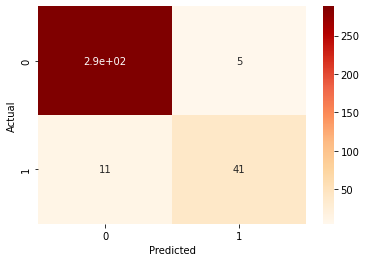

the MCC is: 0.7569206365998438 
 the precision is: 0.8163265306122449 
 the recall is: 0.7692307692307693 
 the f1 socre is: 0.7920792079207921 
 the accuracy is: 0.9391304347826087


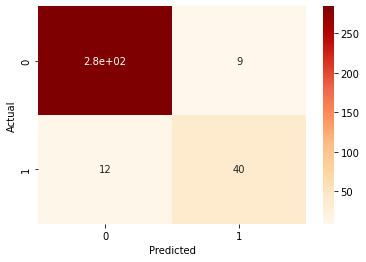

the MCC is: 0.7975923259652151 
 the precision is: 0.9069767441860465 
 the recall is: 0.75 
 the f1 socre is: 0.8210526315789475 
 the accuracy is: 0.9507246376811594


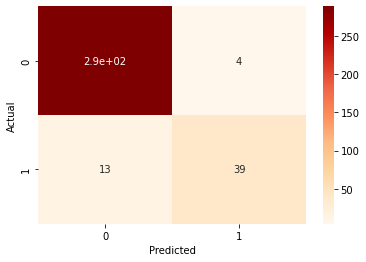

the MCC is: 0.7435952409333627 
 the precision is: 0.8125 
 the recall is: 0.75 
 the f1 socre is: 0.78 
 the accuracy is: 0.936231884057971


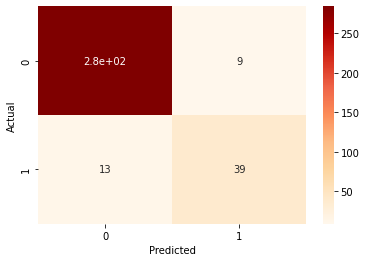

the MCC is: 0.8050901369290441 
 the precision is: 0.8863636363636364 
 the recall is: 0.78 
 the f1 socre is: 0.8297872340425532 
 the accuracy is: 0.9533527696793003


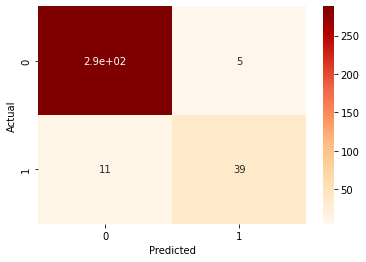

Average Mcc is: 0.7830182483233801 
 Average Q2 is: 0.9466125829213673
 Average Precision is: 0.862694251797603
 Average Recall is: 0.7675384615384615
 Average F1_score is: 0.8119307534839687 
 Average optimal threshold is: 8.444305580694751 


In [83]:
MCC_List=[]
Precision_list=[]
Recall_List=[]
F1_Score_List=[]
Q2_List=[]
Optimal_threshold=[]

runs=[0,1,2,3,4]
for i in runs:
    k.loc[k['Cross-validation fold']!=i]
        
    x_train=k['binary representation']
    y_train_scores=k[i]
    
    precision,recall,thresholds=precision_recall_curve(x_train,y_train_scores)
    fscore=(2*precision*recall)/(recall+precision)
    index=np.argmax(fscore)
    optimal_threshold=(thresholds[index])
    
    RUN=k.loc[k['Cross-validation fold']==i]
    y_test_scores=RUN[i]
    y_pred_test=[int(t_s>=optimal_threshold) for t_s in y_test_scores ]

    y_Actual=RUN['binary representation']
    data = {'y_Actual':  y_Actual  ,
            'y_Predicted': y_pred_test
            }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    MCC=matthews_corrcoef(y_Actual,y_pred_test)
    Precision=precision_score(y_Actual,y_pred_test)
    Recall=recall_score(y_Actual,y_pred_test)
    F1_Score=f1_score(y_Actual,y_pred_test)
    Q2=accuracy_score(y_Actual,y_pred_test)
    
    Optimal_threshold.append(optimal_threshold)
    MCC_List.append(MCC)
    Precision_list.append(Precision)
    Recall_List.append(Recall)
    F1_Score_List.append(F1_Score)
    Q2_List.append(Q2)
#     (Optima_threshold,MCC_List,Precision_list,Recall_List,F1_Score_List,Q2_List).append(zip(list(optimal_threshold,MCC,Precision,Recall,F1_Score,Q2)))
    
    run_statistics=[MCC,Precision,Recall,F1_Score,Q2]
    print(f'the MCC is: {MCC} \n the precision is: {Precision} \n the recall is: {Recall} \n the f1 socre is: {F1_Score} \n the accuracy is: {Q2}')

    sn.heatmap(confusion_matrix, annot=True,cmap="OrRd")
    plt.show()
    
mean_statistics_HJ=[mean(MCC_List),mean(Q2_List),mean(Precision_list),mean(Recall_List),mean(F1_Score_List)]  

print(f'Average Mcc is: {mean_statistics_HJ[0]} \n Average Q2 is: {mean_statistics_HJ[1]}\n Average Precision is: {mean_statistics_HJ[2]}\n Average Recall is: {mean_statistics_HJ[3]}\n Average F1_score is: {mean_statistics_HJ[4]} \n Average optimal threshold is: {mean(Optimal_threshold)} ')
    

In [84]:
Optimal_threshold #optimal threshold for every run of training dataset

[7.9115932119267836,
 8.555750529861536,
 8.486227348087802,
 8.443059516858279,
 8.824897296739358]

## Testing

### Creating prediction matrix for BM dataset

In [85]:
#creating the training matrix based on the whole set of training set
aa=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
training=[]
for location in range(len(df_tr['motif_for_logo'].iloc[0])):
    for j in range(len(aa)):
        summ=0
        for i in range(len(df_tr['motif_for_logo'])):
                summ=summ+(df_tr['motif_for_logo'].iloc[i][location].count(aa[j]))
        training.append(summ+1)
df_training_B=(pd.DataFrame(np.array(training).reshape(15,20),columns=aa))
ppsm_BM=(df_training_B/(len(df_tr)+20))
ppsm_BM.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,0.068345,0.118705,0.129496,0.093525,0.187050,0.125899,0.089928,0.147482,0.161871,0.089928,0.244604,0.071942,0.456835,0.129496,0.050360
R,0.007194,0.007194,0.003597,0.003597,0.003597,0.003597,0.021583,0.007194,0.028777,0.035971,0.007194,0.068345,0.010791,0.043165,0.061151
N,0.003597,0.007194,0.003597,0.014388,0.010791,0.017986,0.007194,0.007194,0.021583,0.010791,0.010791,0.014388,0.003597,0.035971,0.035971
D,0.007194,0.003597,0.003597,0.003597,0.010791,0.003597,0.003597,0.017986,0.057554,0.010791,0.007194,0.050360,0.014388,0.086331,0.064748
C,0.028777,0.025180,0.025180,0.021583,0.046763,0.050360,0.068345,0.039568,0.010791,0.028777,0.046763,0.017986,0.039568,0.017986,0.032374
Q,0.010791,0.007194,0.007194,0.010791,0.007194,0.014388,0.017986,0.014388,0.053957,0.035971,0.007194,0.093525,0.014388,0.050360,0.039568
E,0.003597,0.003597,0.003597,0.007194,0.007194,0.010791,0.028777,0.003597,0.028777,0.021583,0.007194,0.115108,0.007194,0.050360,0.068345
G,0.028777,0.021583,0.025180,0.032374,0.028777,0.028777,0.046763,0.043165,0.111511,0.154676,0.093525,0.039568,0.179856,0.079137,0.053957
H,0.003597,0.014388,0.007194,0.003597,0.003597,0.003597,0.014388,0.007194,0.028777,0.017986,0.007194,0.043165,0.003597,0.021583,0.035971
I,0.089928,0.064748,0.086331,0.035971,0.064748,0.028777,0.039568,0.064748,0.025180,0.021583,0.035971,0.028777,0.010791,0.025180,0.039568


In [86]:
#final training matrix apply on BM dataset
dic_swisprot={'G':0.07,'A':0.08,'V':0.07,'P':0.05,'L':0.1,'I':0.06,'M':0.02,'F':0.04,'W':0.01,'Y':0.03,'S':0.07,'T':0.05,'C':0.01,'N':0.04,'Q':0.04,'H':0.02,'D':0.06,'E':0.07,'K':0.06,'R':0.06}
training_matrix_BM=[]
for pp in range(len(aa)):
    for pos in range(15):
        training_matrix_BM.append(ppsm_BM.iloc[pos][pp]/(dic_swisprot.get(ppsm_BM.iloc[pos].index[pp])))
len(training_matrix_BM)

pswm_BM=pd.DataFrame(np.array(training_matrix_BM).transpose().reshape(20,15),index=aa)
training_matrix_final=pswm_BM.applymap(np.log2)
training_matrix_final



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,-0.227157,0.569309,0.694840,0.225355,1.225355,0.654198,0.168771,0.882467,1.016768,0.168771,1.612378,-0.153157,2.513600,0.694840,-0.667730
R,-3.060047,-3.060047,-4.060047,-4.060047,-4.060047,-4.060047,-1.475085,-3.060047,-1.060047,-0.738119,-3.060047,0.187880,-2.475085,-0.475085,0.027415
N,-3.475085,-2.475085,-3.475085,-1.475085,-1.890122,-1.153157,-2.475085,-2.475085,-0.890122,-1.890122,-1.890122,-1.475085,-3.475085,-0.153157,-0.153157
D,-3.060047,-4.060047,-4.060047,-4.060047,-2.475085,-4.060047,-4.060047,-1.738119,-0.060047,-2.475085,-3.060047,-0.252692,-2.060047,0.524915,0.109878
C,1.524915,1.332270,1.332270,1.109878,2.225355,2.332270,2.772843,1.984347,0.109878,1.524915,2.225355,0.846843,1.984347,0.846843,1.694840
Q,-1.890122,-2.475085,-2.475085,-1.890122,-2.475085,-1.475085,-1.153157,-1.475085,0.431806,-0.153157,-2.475085,1.225355,-1.475085,0.332270,-0.015653
E,-4.282440,-4.282440,-4.282440,-3.282440,-3.282440,-2.697477,-1.282440,-4.282440,-1.282440,-1.697477,-3.282440,0.717560,-3.282440,-0.475085,-0.034512
G,-1.282440,-1.697477,-1.475085,-1.112515,-1.282440,-1.282440,-0.582000,-0.697477,0.671757,1.143825,0.418000,-0.823008,1.361416,0.176992,-0.375549
H,-2.475085,-0.475085,-1.475085,-2.475085,-2.475085,-2.475085,-0.475085,-1.475085,0.524915,-0.153157,-1.475085,1.109878,-2.475085,0.109878,0.846843
I,0.583809,0.109878,0.524915,-0.738119,0.109878,-1.060047,-0.600616,0.109878,-1.252692,-1.475085,-0.738119,-1.060047,-2.475085,-1.252692,-0.600616


In [87]:
# finding max score based on prediciton matrix(overall prediction matrix)

In [88]:
max_score_final=[]
for seq in pd_BM['Sequence (first 50 N-terminal residues)']:
    
    slicee=[]
    scores=[]
    for k in range(36):
        slicee.append(seq[k:k+15]) 
        
        
      
        for seqq in slicee:
            
            
            
            
            i=0
            summ=0
            for s in seqq:
                summ+=training_matrix_final[i].loc[s]
                i+=1     
            scores.append(summ)
            
            
    max_score_final.append(max(scores))

max_score_final

[-1.4661541105558131,
 -3.295154577510504,
 3.9955445713274576,
 3.790241894949432,
 0.4950845464936966,
 0.0612874434265569,
 0.5752173811032166,
 -0.9620930928738314,
 -7.126625822131753,
 1.0345945935808383,
 -0.04641357826752879,
 -6.482291878102232,
 -0.88010037472813,
 -2.188591816234254,
 2.5551497406912214,
 7.782486016670798,
 -0.26777790706560084,
 6.24168347442969,
 -2.916822682783077,
 -8.001502653228265,
 0.06356617687565755,
 0.21377397066531845,
 -6.019428169024663,
 -3.3024399235988806,
 -6.949515412474672,
 -4.350235700890907,
 -0.0323375538332783,
 -1.1773398879320187,
 3.596361597649623,
 -3.6817185147891243,
 -2.176387635350986,
 -3.3205758419507267,
 -6.444626607769431,
 0.030775268765719982,
 -2.199294203669098,
 -0.5783385581138989,
 3.7733245528416415,
 -5.90187913131797,
 -2.521341148973912,
 -4.332621142163257,
 -4.876383710257371,
 0.1719049344849235,
 -2.8870845591596477,
 3.046792066657378,
 2.6088814948191006,
 3.0716657053152847,
 -0.024302471763347544,
 

In [231]:
#CREATING THE BINARY_REPRESETNATION COLUMN IN BENCHMARCK DATAFRAME
pd_BM['binary representation']=0*len(pd_BM)
for i in range(len(pd_BM)):
    if pd_BM['Class'][i]=='SP':
        pd_BM['binary representation'][i]=1
    else:
        pd_BM['binary representation'][i]=0


the MCC is: 0.5904584057685236 
 the precision is: 0.4890282131661442 
 the recall is: 0.7464114832535885 
 the f1 socre is: 0.5909090909090909 
 the accuracy is: 0.971030042918455


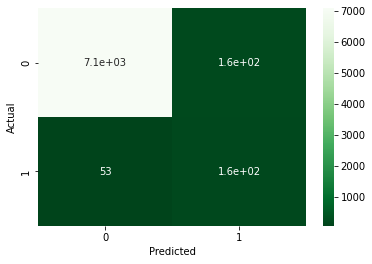

In [232]:
#APPLY average threshold on benchmark dataset
threshold_average=mean(Optimal_threshold)
y_test_scores_BM=max_score_final
y_pred_HJ=[int(t_s>=threshold_average) for t_s in y_test_scores_BM ]

y_Actual_HJ=pd_BM['binary representation']
data = {'y_Actual':  y_Actual_HJ  ,
        'y_Predicted': y_pred_HJ
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
MCC=matthews_corrcoef(y_Actual_HJ,y_pred_HJ)
Precision=precision_score(y_Actual_HJ,y_pred_HJ)
Recall=recall_score(y_Actual_HJ,y_pred_HJ)
F1_Score=f1_score(y_Actual_HJ,y_pred_HJ)
Q2=accuracy_score(y_Actual_HJ,y_pred_HJ)
Standard_Error=np.std(y_pred_HJ)
statistics_BM_HJ=[MCC,Precision,Recall,F1_Score,Q2]

print(f'the MCC is: {MCC} \n the precision is: {Precision} \n the recall is: {Recall} \n the f1 socre is: {F1_Score} \n the accuracy is: {Q2}')
sn.heatmap(confusion_matrix, annot=True,cmap="Greens_r")
plt.show()

In [233]:
comparison_df_HJ= pd.DataFrame({'IDS':pd_BM.loc[:,'UniProtKB accession'].tolist(),'predicted_class': y_pred_HJ,'actual_class':pd_BM.loc[:,'binary representation HJ'].tolist()}) 
comparison_df_HJ

,IDS,predicted_class,actual_class
0,Q8TF40,0,0
1,Q1ENB6,0,0
2,Q9BZS1,0,0
3,F4K2A1,0,0
4,Q9SZL8,0,0
...,...,...,...
7451,O74327,0,0
7452,Q9UM00,0,0
7453,Q93Y07,0,0
7454,Q86TL2,0,0


<div class="alert-success">
<b> <span style="font-size:26px;"> This is a green colored box </span> <b>
</div>
 
    
<div class="alert-danger">
This is a red colored box
</div>

<div class="alert-warning">
This is a yellow colored box
</div>

<div class="alert-info">
This is a blue colored box
</div>

In [165]:
TN_HJ=confusion_matrix[0][0]
FP_HJ=confusion_matrix[1][0]


# SVM Method

## Training 

In [91]:
pd_tr['signal_peptide_residue_basedon_k']=pd_tr.apply(lambda x: x['Sequence (first 50 N-terminal residues)'][:20], axis=1)
pd_tr['signal_peptide_residue_basedon_k']

0       MRFLAATFLLLALSTAAQAE
1       MAGKEVIFIMALFIAVESSP
2       MRVFLAICLSLTVALAAETG
3       MASSSAKILLPLSLLFTLLS
4       MNYLVMISLALLLMIGVESV
                ...         
1718    MPVQVLKIIKGKPETQLPSH
1719    MSKFLDMLSGSQCVSLEKCG
1720    MAAVYSGISLKLKSKTTSWE
1721    MAENVVEPGPPSAKRPKLSS
1722    MGCPNCGSTTFESDTASGNT
Name: signal_peptide_residue_basedon_k, Length: 1723, dtype: object

In [92]:
#calculating the first 20 compostion 

aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
bb=[]
for j in pd_tr['signal_peptide_residue_basedon_k']:
    for i in aa:
        bb.append((len(re.findall(i,j))/len(j)))
df_bbb = pd.DataFrame(np.array(bb).reshape(len(pd_tr['signal_peptide_residue_basedon_k']),20),index=pd_tr['signal_peptide_residue_basedon_k'])
#adding two columns of main dataframe to new dataframe
df_bbb[['Cross-validation fold','Class']]=pd_tr[['Cross-validation fold','Class']].values
# df_bbb.iloc[:,0:20]
#convert class to label of +1 and 0
df_bbb['binary_representation']=np.where(df_bbb['Class'] =='SP' , 1 , 0)
df_bbb

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Cross-validation fold,Class,binary_representation
signal_peptide_residue_basedon_k,,,,,,,,,,,,,,,,,,,,,
MRFLAATFLLLALSTAAQAE,0.00,0.30,0.00,0.00,0.25,0.00,0.05,0.10,0.00,0.00,...,0.00,0.05,0.00,0.00,0.05,0.00,0.05,0,SP,1
MAGKEVIFIMALFIAVESSP,0.05,0.15,0.10,0.05,0.05,0.15,0.10,0.10,0.00,0.00,...,0.00,0.00,0.00,0.00,0.10,0.05,0.00,0,SP,1
MRVFLAICLSLTVALAAETG,0.05,0.20,0.10,0.00,0.20,0.05,0.05,0.05,0.00,0.00,...,0.00,0.00,0.00,0.00,0.05,0.00,0.05,0,SP,1
MASSSAKILLPLSLLFTLLS,0.00,0.10,0.00,0.05,0.35,0.05,0.05,0.05,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0,SP,1
MNYLVMISLALLLMIGVESV,0.05,0.05,0.15,0.00,0.25,0.10,0.15,0.00,0.00,0.05,...,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MPVQVLKIIKGKPETQLPSH,0.05,0.00,0.10,0.15,0.10,0.10,0.05,0.00,0.00,0.00,...,0.00,0.10,0.05,0.00,0.05,0.15,0.00,4,NO_SP,0
MSKFLDMLSGSQCVSLEKCG,0.10,0.00,0.05,0.00,0.15,0.00,0.10,0.05,0.00,0.00,...,0.00,0.05,0.00,0.05,0.05,0.10,0.00,4,NO_SP,0
MAAVYSGISLKLKSKTTSWE,0.05,0.10,0.05,0.00,0.10,0.05,0.05,0.00,0.05,0.05,...,0.00,0.00,0.00,0.00,0.05,0.15,0.00,4,NO_SP,0


In [93]:
mySVC = svm.SVC(C=1, kernel='rbf', gamma=0.5)
X = df_bbb.iloc[:,0:20].loc[df_bbb['Cross-validation fold']!=0]
y = df_bbb.iloc[:,22:23].loc[df_bbb['Cross-validation fold']!=0]
mySVC.fit(X, y)

SVC(C=1, gamma=0.5)

In [94]:
#getting support vectors
sv = mySVC.support_vectors_
# Print the number of support vectors for each class
print('number of support vectors for each class is:   ',mySVC.n_support_)
# # Getting decision function values on testdata
X_test= df_bbb.iloc[:,0:20].loc[df_bbb['Cross-validation fold']==0]
#desicion function
DF = mySVC.predict(X_test)
DF

number of support vectors for each class is:    [185 182]


array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

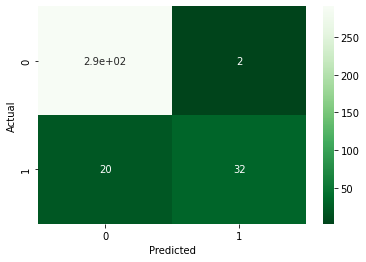

0.7304967497307764

In [95]:

data = {'y_Actual':  df_bbb.loc[:,'binary_representation'].loc[df_bbb['Cross-validation fold']==0].tolist() ,
        'y_Predicted': DF
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True,cmap="Greens_r")
plt.show()
#calculating MCC 
MCC=matthews_corrcoef(df_bbb.loc[:,'binary_representation'].loc[df_bbb['Cross-validation fold']==0].tolist(), DF)
MCC

number of support vectors in combination of 20 , 0.5 , 1 for each class is: [185 182]
it is the run for testing set is 0


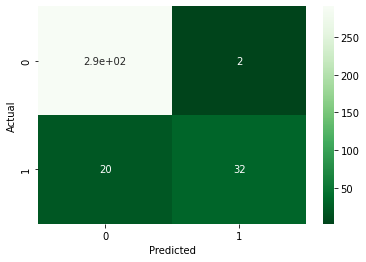

number of support vectors in combination of 20 , 0.5 , 2 for each class is: [160 152]
it is the run for testing set is 0


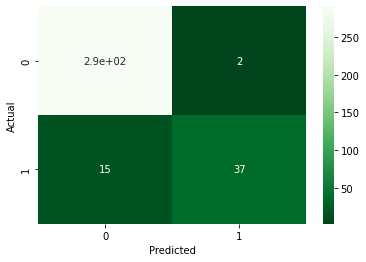

number of support vectors in combination of 20 , 0.5 , 4 for each class is: [135 131]
it is the run for testing set is 0


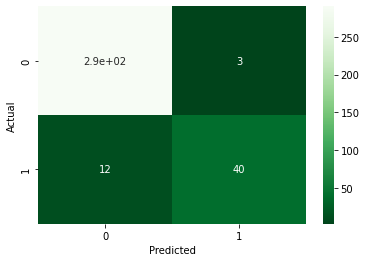

number of support vectors in combination of 20 , 1 , 1 for each class is: [159 154]
it is the run for testing set is 0


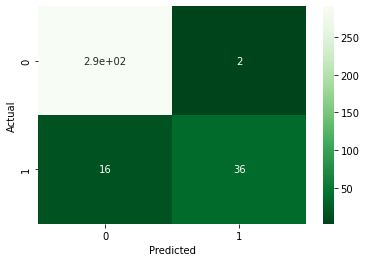

number of support vectors in combination of 20 , 1 , 2 for each class is: [138 132]
it is the run for testing set is 0


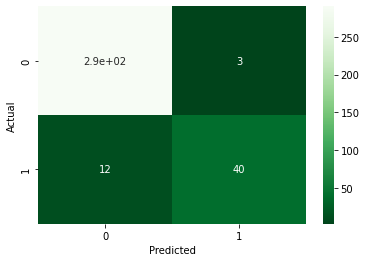

number of support vectors in combination of 20 , 1 , 4 for each class is: [120 114]
it is the run for testing set is 0


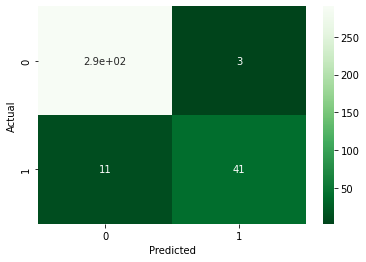

number of support vectors in combination of 20 , scale , 1 for each class is: [151 118]
it is the run for testing set is 0


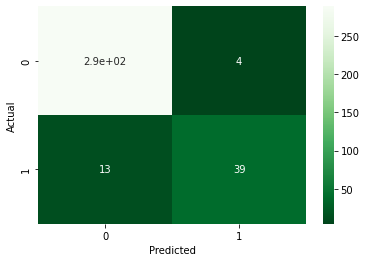

number of support vectors in combination of 20 , scale , 2 for each class is: [151  98]
it is the run for testing set is 0


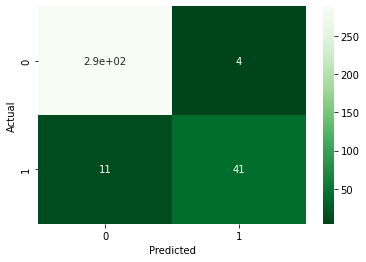

number of support vectors in combination of 20 , scale , 4 for each class is: [152 101]
it is the run for testing set is 0


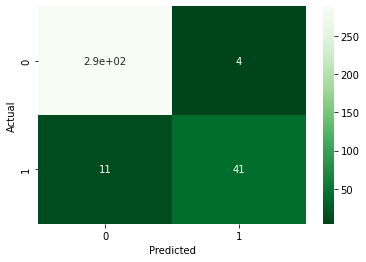

number of support vectors in combination of 22 , 0.5 , 1 for each class is: [192 188]
it is the run for testing set is 0


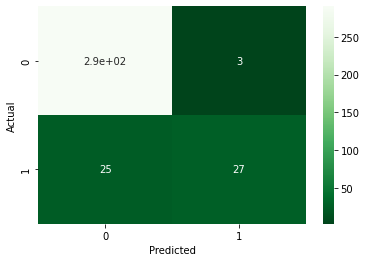

number of support vectors in combination of 22 , 0.5 , 2 for each class is: [166 163]
it is the run for testing set is 0


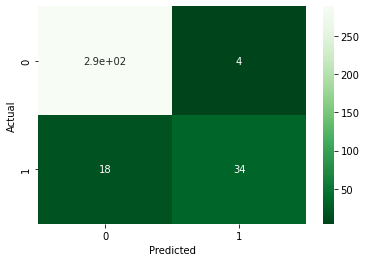

number of support vectors in combination of 22 , 0.5 , 4 for each class is: [145 140]
it is the run for testing set is 0


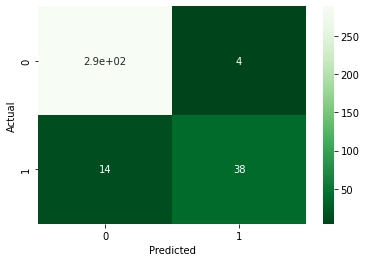

number of support vectors in combination of 22 , 1 , 1 for each class is: [169 165]
it is the run for testing set is 0


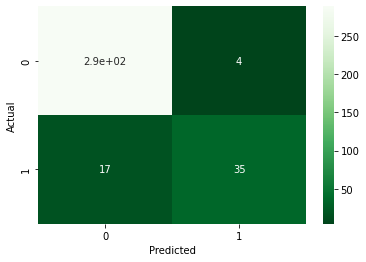

number of support vectors in combination of 22 , 1 , 2 for each class is: [146 142]
it is the run for testing set is 0


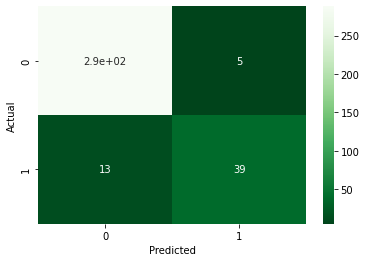

number of support vectors in combination of 22 , 1 , 4 for each class is: [129 123]
it is the run for testing set is 0


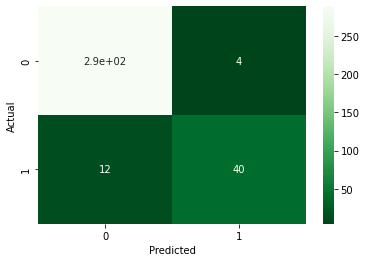

number of support vectors in combination of 22 , scale , 1 for each class is: [154 119]
it is the run for testing set is 0


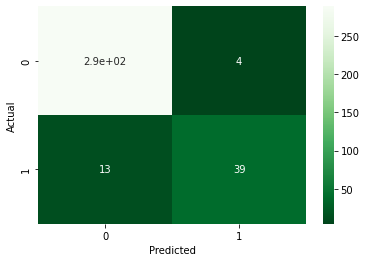

number of support vectors in combination of 22 , scale , 2 for each class is: [152 114]
it is the run for testing set is 0


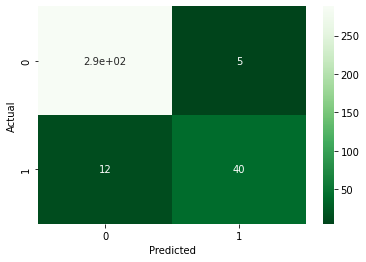

number of support vectors in combination of 22 , scale , 4 for each class is: [149 114]
it is the run for testing set is 0


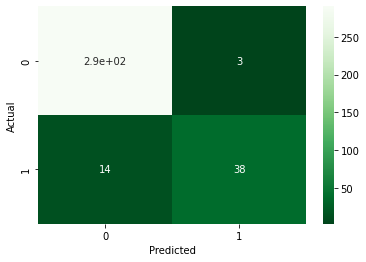

number of support vectors in combination of 24 , 0.5 , 1 for each class is: [203 195]
it is the run for testing set is 0


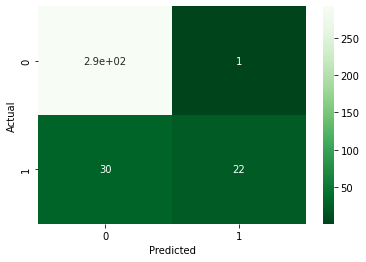

number of support vectors in combination of 24 , 0.5 , 2 for each class is: [176 173]
it is the run for testing set is 0


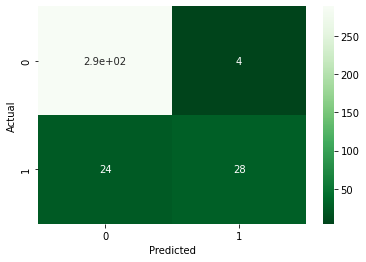

number of support vectors in combination of 24 , 0.5 , 4 for each class is: [157 152]
it is the run for testing set is 0


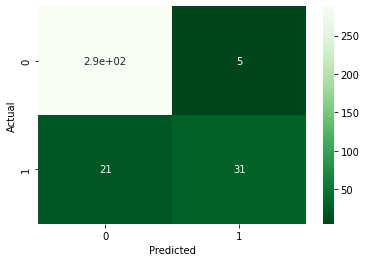

number of support vectors in combination of 24 , 1 , 1 for each class is: [178 172]
it is the run for testing set is 0


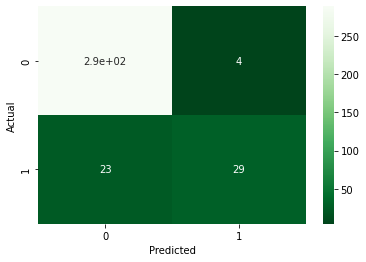

number of support vectors in combination of 24 , 1 , 2 for each class is: [160 152]
it is the run for testing set is 0


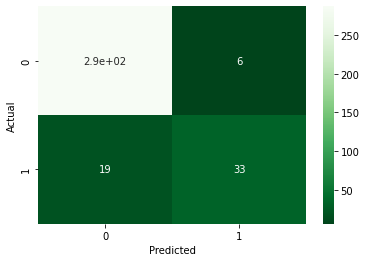

number of support vectors in combination of 24 , 1 , 4 for each class is: [138 135]
it is the run for testing set is 0


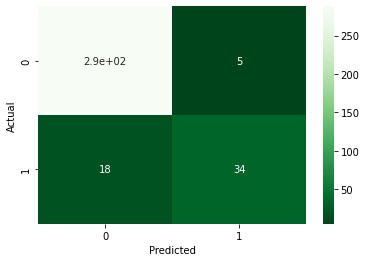

number of support vectors in combination of 24 , scale , 1 for each class is: [150 133]
it is the run for testing set is 0


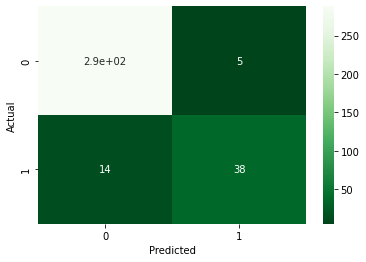

number of support vectors in combination of 24 , scale , 2 for each class is: [154 125]
it is the run for testing set is 0


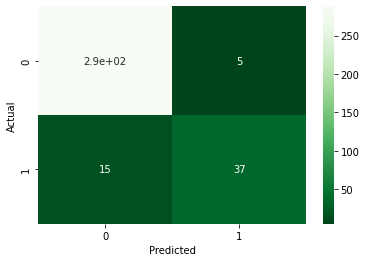

number of support vectors in combination of 24 , scale , 4 for each class is: [151 120]
it is the run for testing set is 0


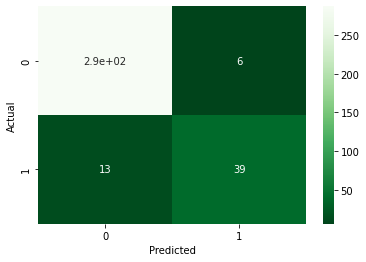

number of support vectors in combination of 20 , 0.5 , 1 for each class is: [182 178]
it is the run for testing set is 1


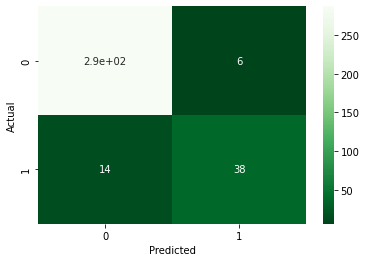

number of support vectors in combination of 20 , 0.5 , 2 for each class is: [155 155]
it is the run for testing set is 1


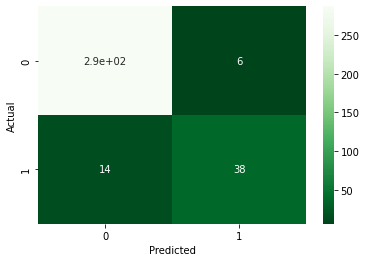

number of support vectors in combination of 20 , 0.5 , 4 for each class is: [135 134]
it is the run for testing set is 1


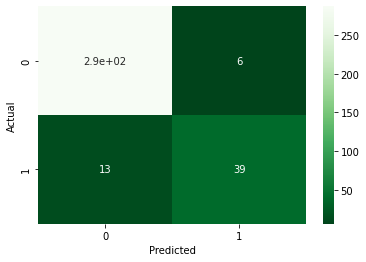

number of support vectors in combination of 20 , 1 , 1 for each class is: [157 156]
it is the run for testing set is 1


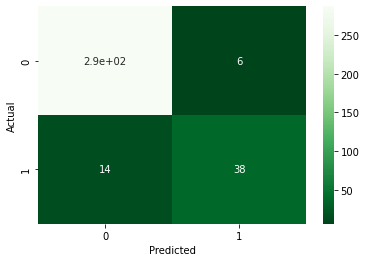

number of support vectors in combination of 20 , 1 , 2 for each class is: [135 135]
it is the run for testing set is 1


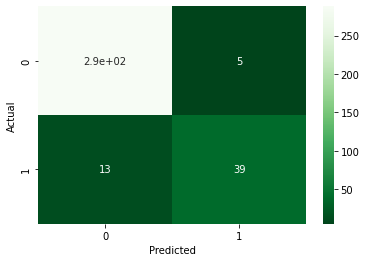

number of support vectors in combination of 20 , 1 , 4 for each class is: [121 113]
it is the run for testing set is 1


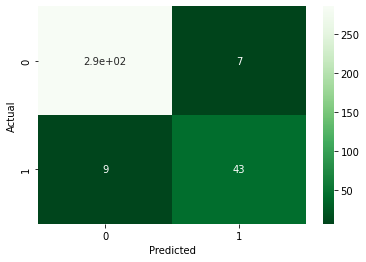

number of support vectors in combination of 20 , scale , 1 for each class is: [144 110]
it is the run for testing set is 1


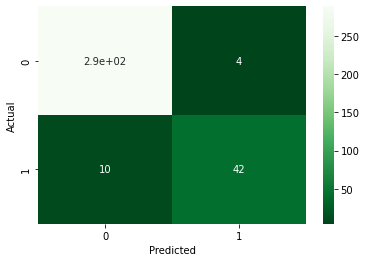

number of support vectors in combination of 20 , scale , 2 for each class is: [136 103]
it is the run for testing set is 1


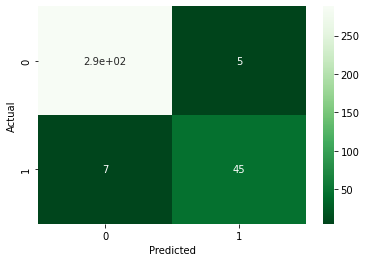

number of support vectors in combination of 20 , scale , 4 for each class is: [142  96]
it is the run for testing set is 1


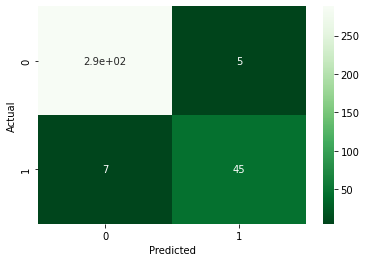

number of support vectors in combination of 22 , 0.5 , 1 for each class is: [187 184]
it is the run for testing set is 1


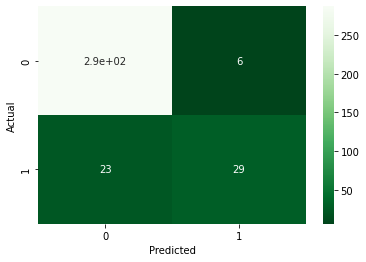

number of support vectors in combination of 22 , 0.5 , 2 for each class is: [165 161]
it is the run for testing set is 1


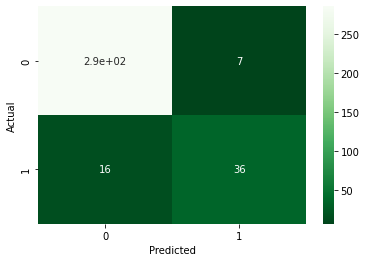

number of support vectors in combination of 22 , 0.5 , 4 for each class is: [143 141]
it is the run for testing set is 1


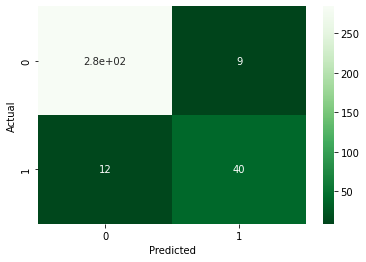

number of support vectors in combination of 22 , 1 , 1 for each class is: [167 162]
it is the run for testing set is 1


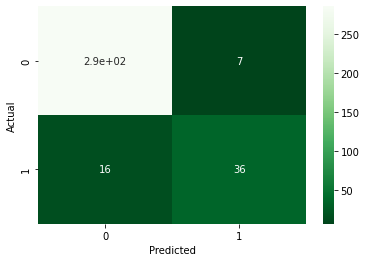

number of support vectors in combination of 22 , 1 , 2 for each class is: [143 142]
it is the run for testing set is 1


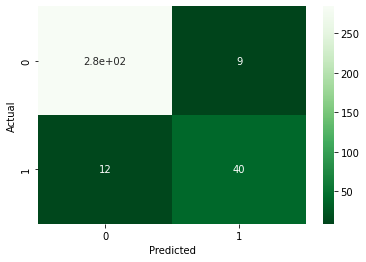

number of support vectors in combination of 22 , 1 , 4 for each class is: [127 125]
it is the run for testing set is 1


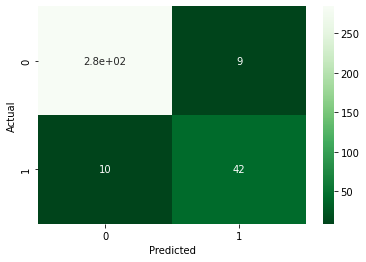

number of support vectors in combination of 22 , scale , 1 for each class is: [140 122]
it is the run for testing set is 1


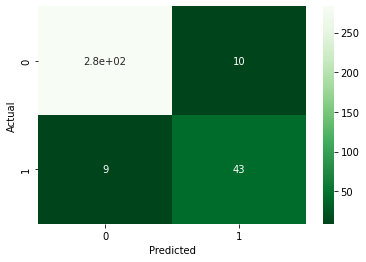

number of support vectors in combination of 22 , scale , 2 for each class is: [143 108]
it is the run for testing set is 1


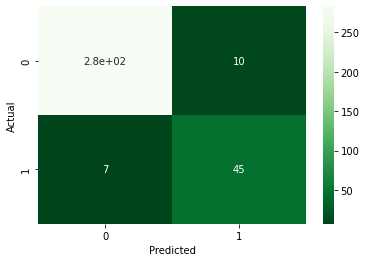

number of support vectors in combination of 22 , scale , 4 for each class is: [142 106]
it is the run for testing set is 1


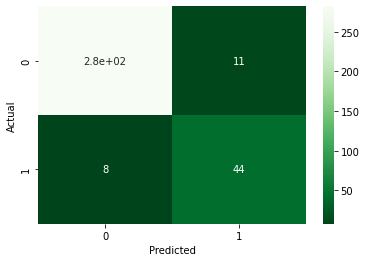

number of support vectors in combination of 24 , 0.5 , 1 for each class is: [200 192]
it is the run for testing set is 1


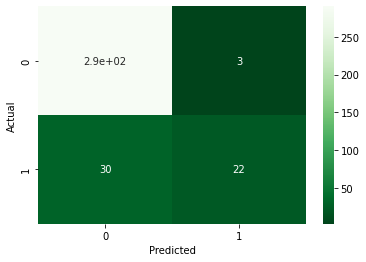

number of support vectors in combination of 24 , 0.5 , 2 for each class is: [173 169]
it is the run for testing set is 1


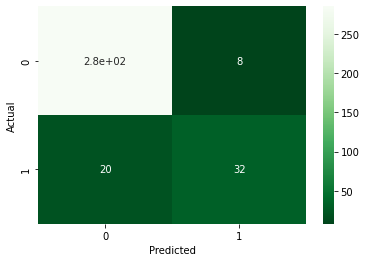

number of support vectors in combination of 24 , 0.5 , 4 for each class is: [155 150]
it is the run for testing set is 1


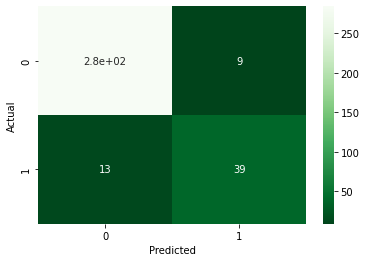

number of support vectors in combination of 24 , 1 , 1 for each class is: [174 170]
it is the run for testing set is 1


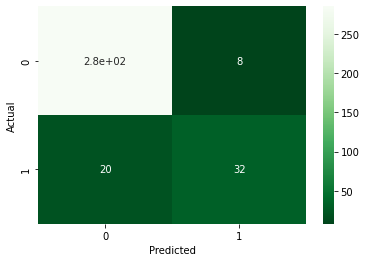

number of support vectors in combination of 24 , 1 , 2 for each class is: [155 151]
it is the run for testing set is 1


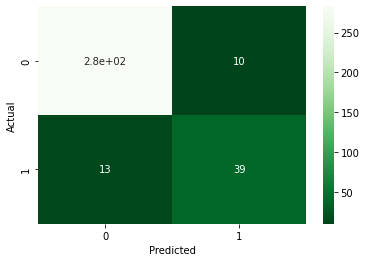

number of support vectors in combination of 24 , 1 , 4 for each class is: [137 134]
it is the run for testing set is 1


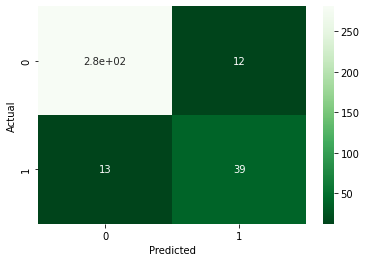

number of support vectors in combination of 24 , scale , 1 for each class is: [143 127]
it is the run for testing set is 1


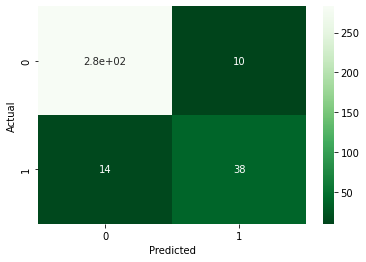

number of support vectors in combination of 24 , scale , 2 for each class is: [148 115]
it is the run for testing set is 1


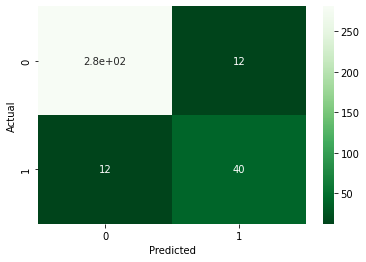

number of support vectors in combination of 24 , scale , 4 for each class is: [157 117]
it is the run for testing set is 1


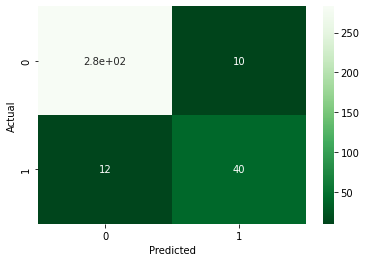

number of support vectors in combination of 20 , 0.5 , 1 for each class is: [190 188]
it is the run for testing set is 2


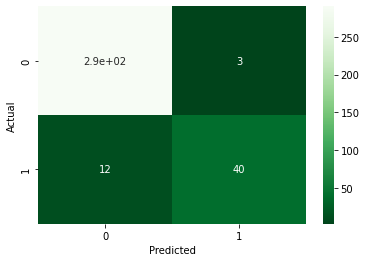

number of support vectors in combination of 20 , 0.5 , 2 for each class is: [166 162]
it is the run for testing set is 2


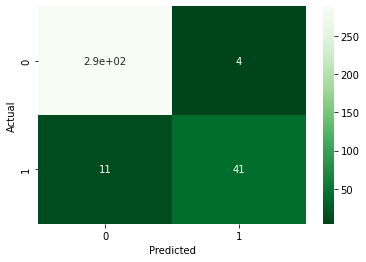

number of support vectors in combination of 20 , 0.5 , 4 for each class is: [139 137]
it is the run for testing set is 2


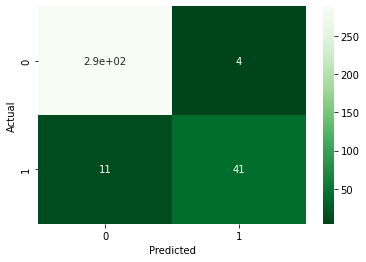

number of support vectors in combination of 20 , 1 , 1 for each class is: [168 162]
it is the run for testing set is 2


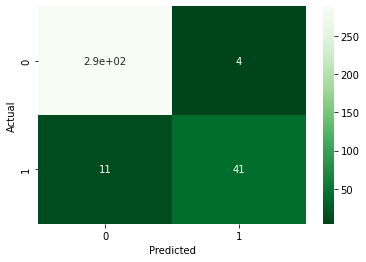

number of support vectors in combination of 20 , 1 , 2 for each class is: [142 137]
it is the run for testing set is 2


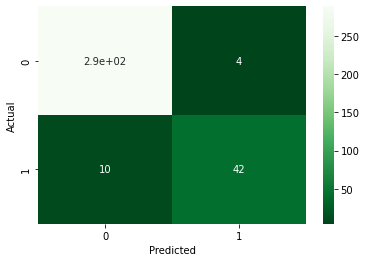

number of support vectors in combination of 20 , 1 , 4 for each class is: [123 120]
it is the run for testing set is 2


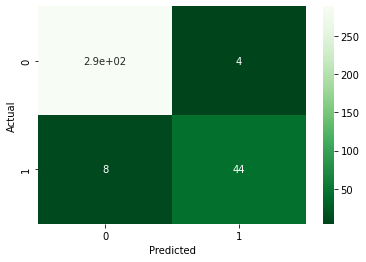

number of support vectors in combination of 20 , scale , 1 for each class is: [144 117]
it is the run for testing set is 2


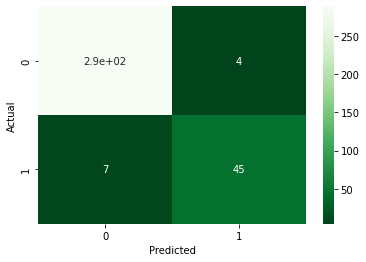

number of support vectors in combination of 20 , scale , 2 for each class is: [145 105]
it is the run for testing set is 2


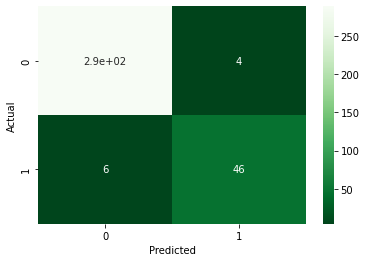

number of support vectors in combination of 20 , scale , 4 for each class is: [148  97]
it is the run for testing set is 2


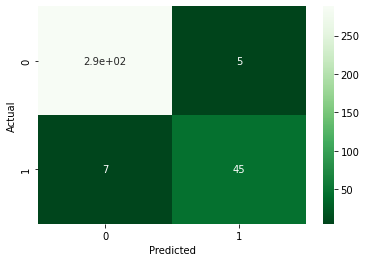

number of support vectors in combination of 22 , 0.5 , 1 for each class is: [196 193]
it is the run for testing set is 2


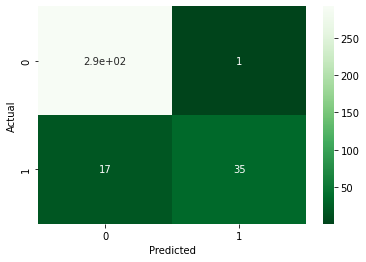

number of support vectors in combination of 22 , 0.5 , 2 for each class is: [173 169]
it is the run for testing set is 2


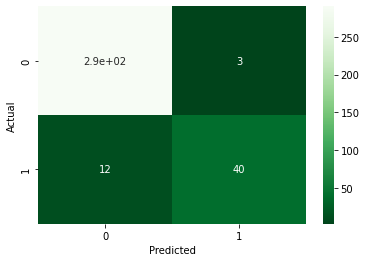

number of support vectors in combination of 22 , 0.5 , 4 for each class is: [151 148]
it is the run for testing set is 2


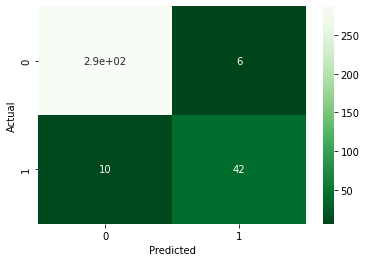

number of support vectors in combination of 22 , 1 , 1 for each class is: [175 170]
it is the run for testing set is 2


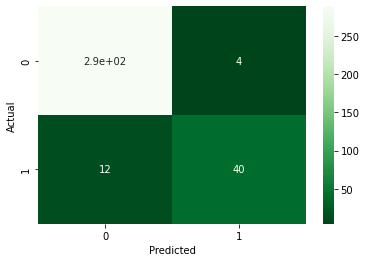

number of support vectors in combination of 22 , 1 , 2 for each class is: [153 148]
it is the run for testing set is 2


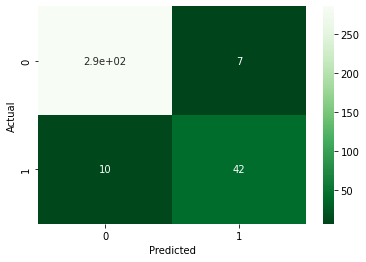

number of support vectors in combination of 22 , 1 , 4 for each class is: [132 130]
it is the run for testing set is 2


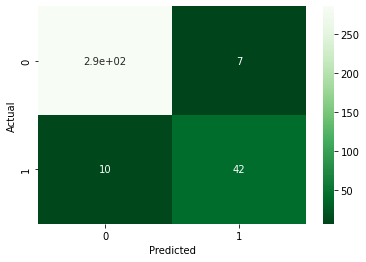

number of support vectors in combination of 22 , scale , 1 for each class is: [145 123]
it is the run for testing set is 2


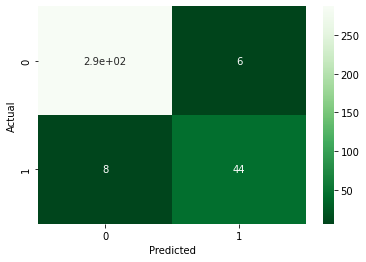

number of support vectors in combination of 22 , scale , 2 for each class is: [148 116]
it is the run for testing set is 2


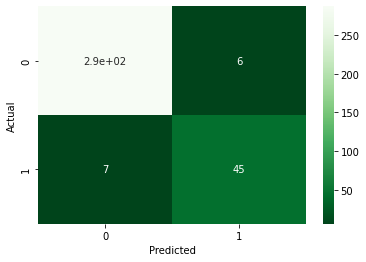

number of support vectors in combination of 22 , scale , 4 for each class is: [148 110]
it is the run for testing set is 2


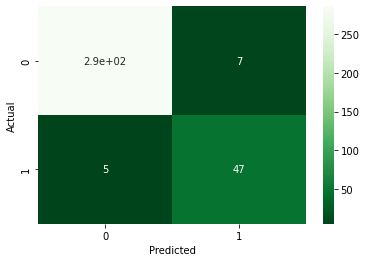

number of support vectors in combination of 24 , 0.5 , 1 for each class is: [200 198]
it is the run for testing set is 2


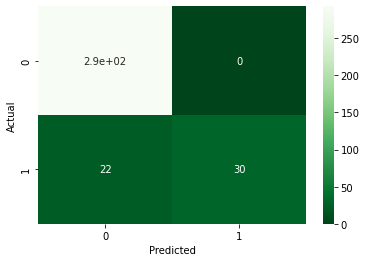

number of support vectors in combination of 24 , 0.5 , 2 for each class is: [182 178]
it is the run for testing set is 2


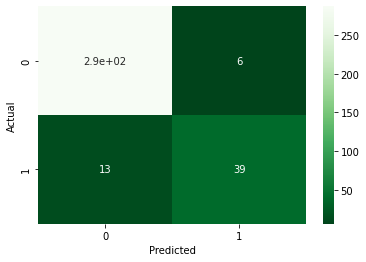

number of support vectors in combination of 24 , 0.5 , 4 for each class is: [163 158]
it is the run for testing set is 2


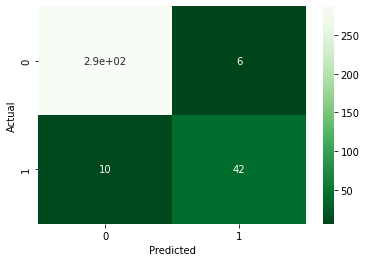

number of support vectors in combination of 24 , 1 , 1 for each class is: [185 179]
it is the run for testing set is 2


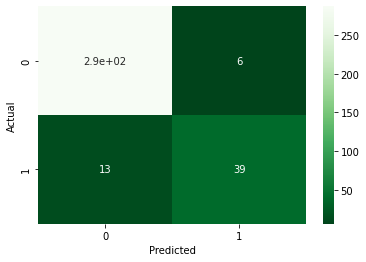

number of support vectors in combination of 24 , 1 , 2 for each class is: [164 157]
it is the run for testing set is 2


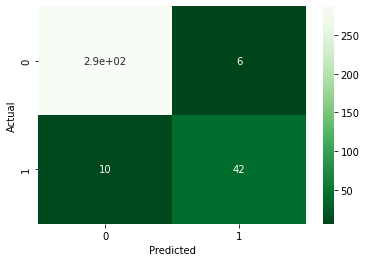

number of support vectors in combination of 24 , 1 , 4 for each class is: [145 140]
it is the run for testing set is 2


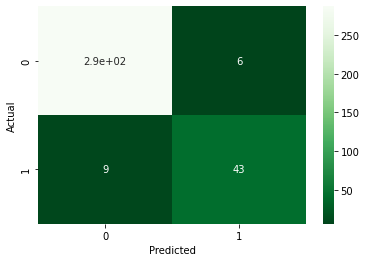

number of support vectors in combination of 24 , scale , 1 for each class is: [159 139]
it is the run for testing set is 2


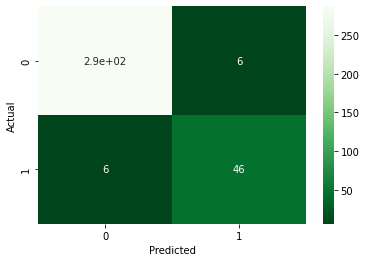

number of support vectors in combination of 24 , scale , 2 for each class is: [157 127]
it is the run for testing set is 2


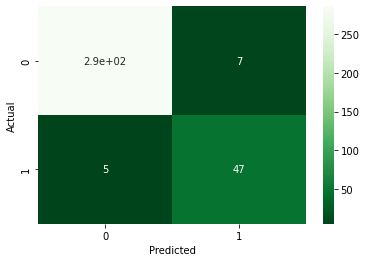

number of support vectors in combination of 24 , scale , 4 for each class is: [162 123]
it is the run for testing set is 2


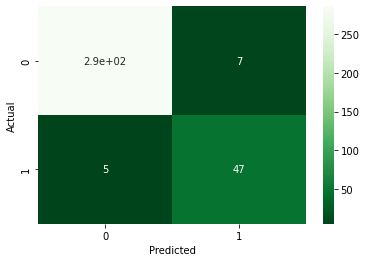

number of support vectors in combination of 20 , 0.5 , 1 for each class is: [190 184]
it is the run for testing set is 3


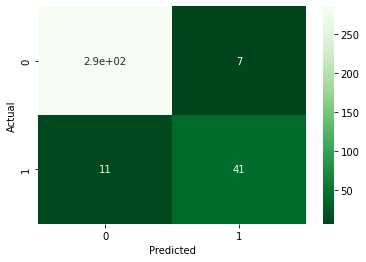

number of support vectors in combination of 20 , 0.5 , 2 for each class is: [159 156]
it is the run for testing set is 3


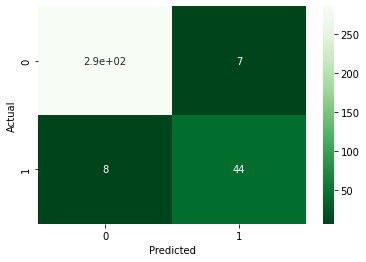

number of support vectors in combination of 20 , 0.5 , 4 for each class is: [137 134]
it is the run for testing set is 3


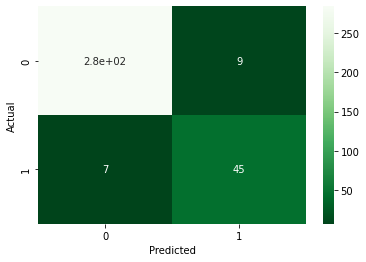

number of support vectors in combination of 20 , 1 , 1 for each class is: [159 159]
it is the run for testing set is 3


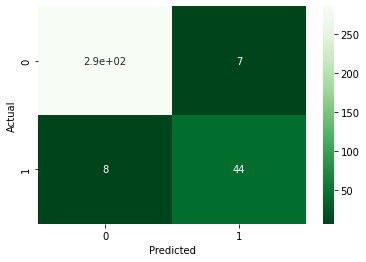

number of support vectors in combination of 20 , 1 , 2 for each class is: [138 135]
it is the run for testing set is 3


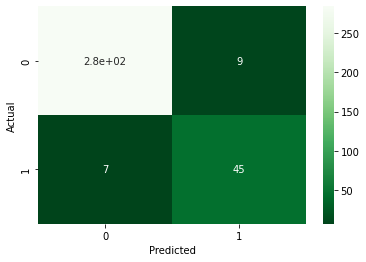

number of support vectors in combination of 20 , 1 , 4 for each class is: [116 116]
it is the run for testing set is 3


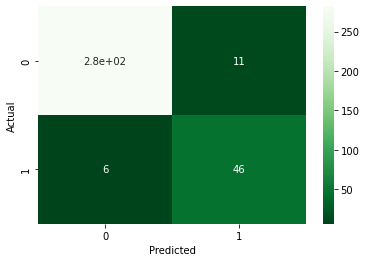

number of support vectors in combination of 20 , scale , 1 for each class is: [134 111]
it is the run for testing set is 3


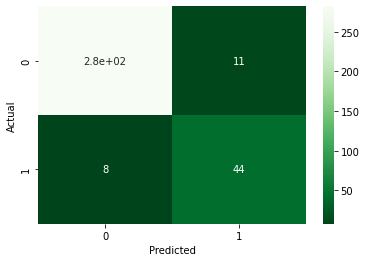

number of support vectors in combination of 20 , scale , 2 for each class is: [133  97]
it is the run for testing set is 3


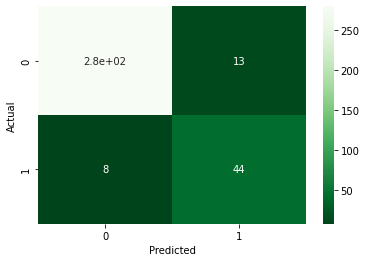

number of support vectors in combination of 20 , scale , 4 for each class is: [136  96]
it is the run for testing set is 3


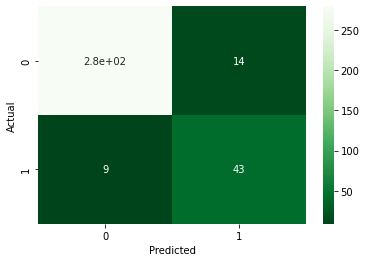

number of support vectors in combination of 22 , 0.5 , 1 for each class is: [195 190]
it is the run for testing set is 3


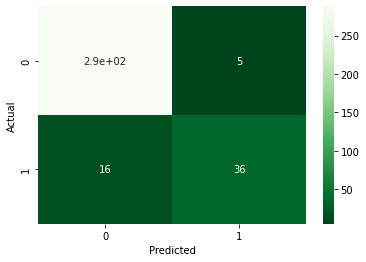

number of support vectors in combination of 22 , 0.5 , 2 for each class is: [169 167]
it is the run for testing set is 3


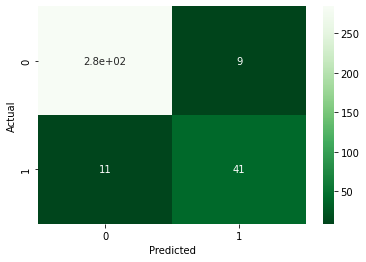

number of support vectors in combination of 22 , 0.5 , 4 for each class is: [145 141]
it is the run for testing set is 3


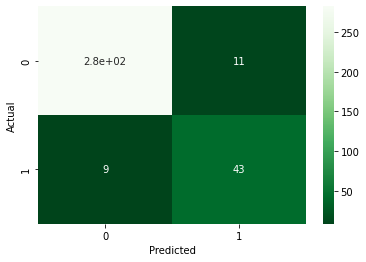

number of support vectors in combination of 22 , 1 , 1 for each class is: [174 167]
it is the run for testing set is 3


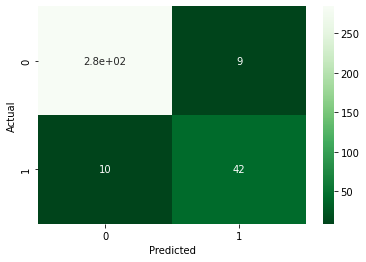

number of support vectors in combination of 22 , 1 , 2 for each class is: [147 142]
it is the run for testing set is 3


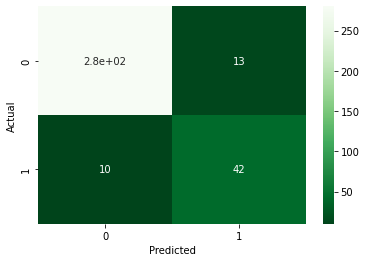

number of support vectors in combination of 22 , 1 , 4 for each class is: [127 121]
it is the run for testing set is 3


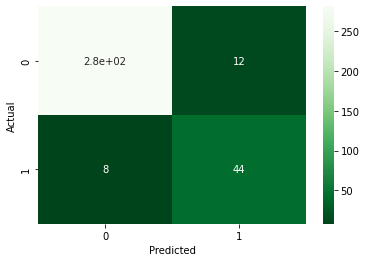

number of support vectors in combination of 22 , scale , 1 for each class is: [139 113]
it is the run for testing set is 3


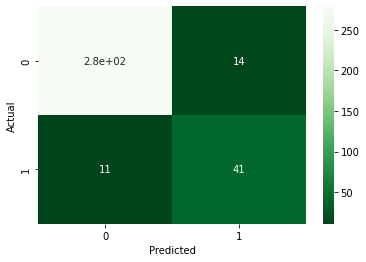

number of support vectors in combination of 22 , scale , 2 for each class is: [127 105]
it is the run for testing set is 3


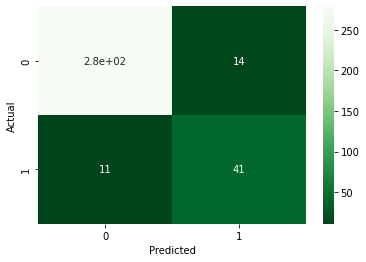

number of support vectors in combination of 22 , scale , 4 for each class is: [134 105]
it is the run for testing set is 3


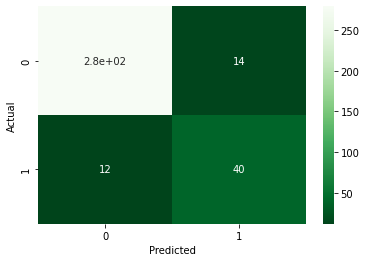

number of support vectors in combination of 24 , 0.5 , 1 for each class is: [202 199]
it is the run for testing set is 3


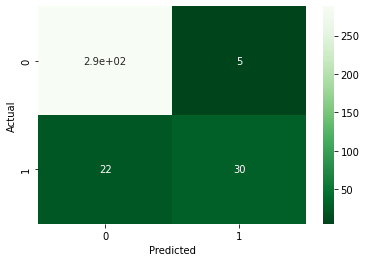

number of support vectors in combination of 24 , 0.5 , 2 for each class is: [182 177]
it is the run for testing set is 3


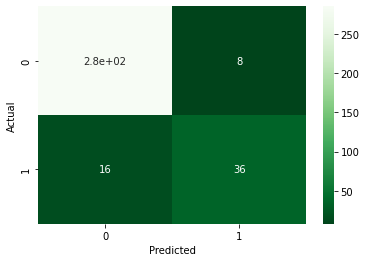

number of support vectors in combination of 24 , 0.5 , 4 for each class is: [157 152]
it is the run for testing set is 3


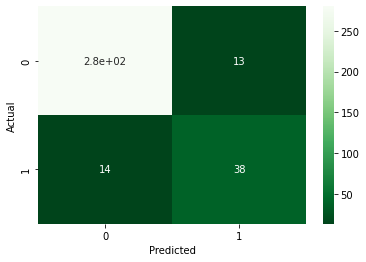

number of support vectors in combination of 24 , 1 , 1 for each class is: [182 177]
it is the run for testing set is 3


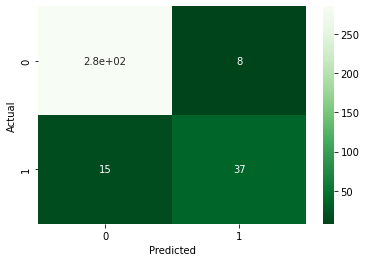

number of support vectors in combination of 24 , 1 , 2 for each class is: [159 154]
it is the run for testing set is 3


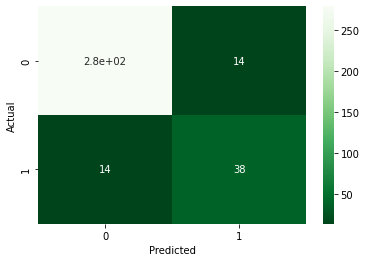

number of support vectors in combination of 24 , 1 , 4 for each class is: [139 132]
it is the run for testing set is 3


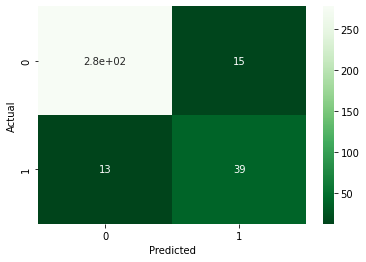

number of support vectors in combination of 24 , scale , 1 for each class is: [147 128]
it is the run for testing set is 3


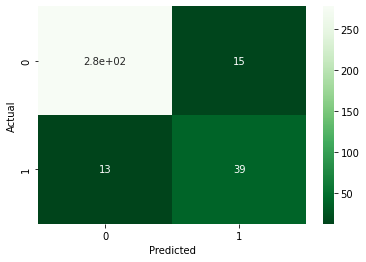

number of support vectors in combination of 24 , scale , 2 for each class is: [143 112]
it is the run for testing set is 3


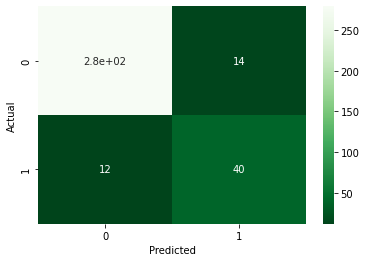

number of support vectors in combination of 24 , scale , 4 for each class is: [139 108]
it is the run for testing set is 3


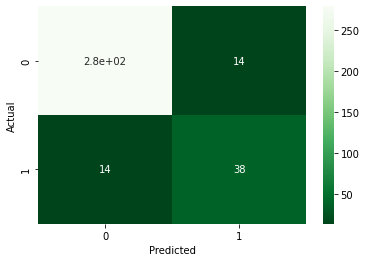

number of support vectors in combination of 20 , 0.5 , 1 for each class is: [188 185]
it is the run for testing set is 4


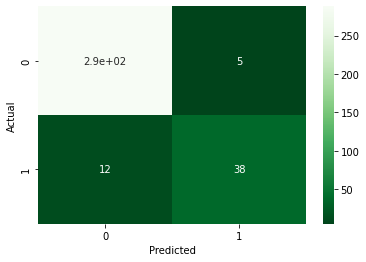

number of support vectors in combination of 20 , 0.5 , 2 for each class is: [161 156]
it is the run for testing set is 4


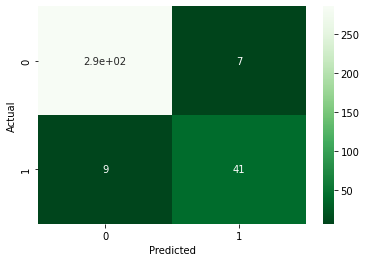

number of support vectors in combination of 20 , 0.5 , 4 for each class is: [139 134]
it is the run for testing set is 4


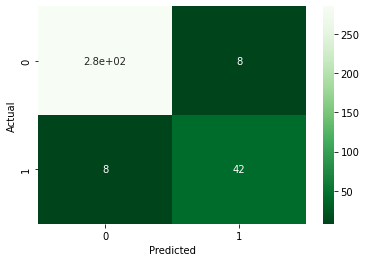

number of support vectors in combination of 20 , 1 , 1 for each class is: [161 158]
it is the run for testing set is 4


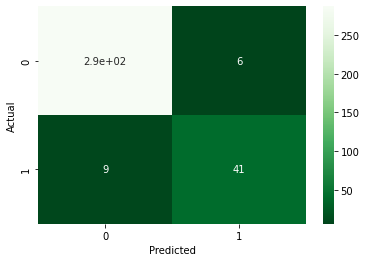

number of support vectors in combination of 20 , 1 , 2 for each class is: [138 136]
it is the run for testing set is 4


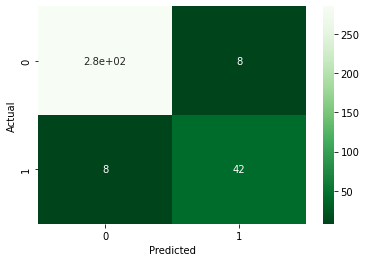

number of support vectors in combination of 20 , 1 , 4 for each class is: [119 116]
it is the run for testing set is 4


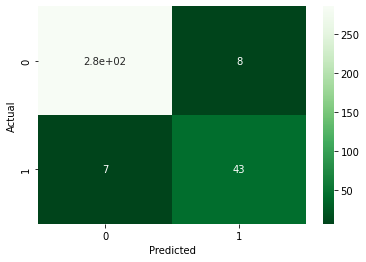

number of support vectors in combination of 20 , scale , 1 for each class is: [157 110]
it is the run for testing set is 4


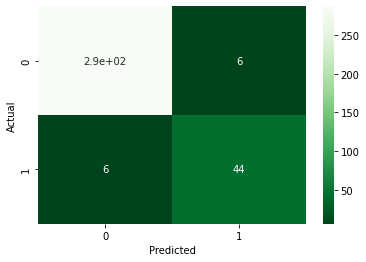

number of support vectors in combination of 20 , scale , 2 for each class is: [143 102]
it is the run for testing set is 4


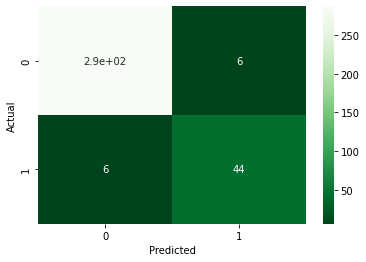

number of support vectors in combination of 20 , scale , 4 for each class is: [146  97]
it is the run for testing set is 4


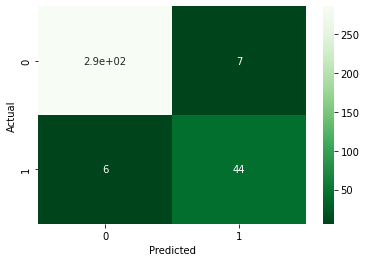

number of support vectors in combination of 22 , 0.5 , 1 for each class is: [196 191]
it is the run for testing set is 4


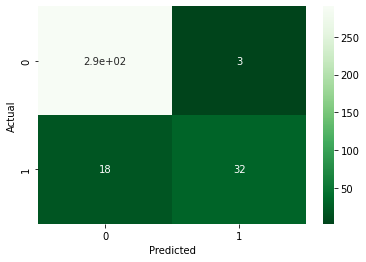

number of support vectors in combination of 22 , 0.5 , 2 for each class is: [170 166]
it is the run for testing set is 4


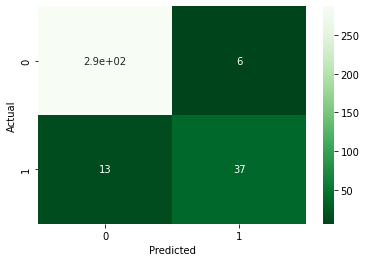

number of support vectors in combination of 22 , 0.5 , 4 for each class is: [146 141]
it is the run for testing set is 4


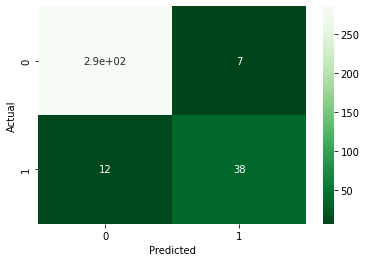

number of support vectors in combination of 22 , 1 , 1 for each class is: [170 166]
it is the run for testing set is 4


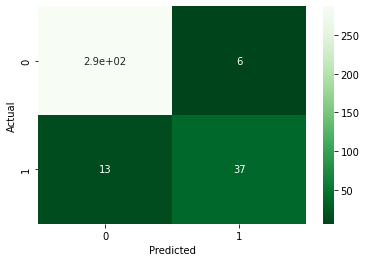

number of support vectors in combination of 22 , 1 , 2 for each class is: [151 143]
it is the run for testing set is 4


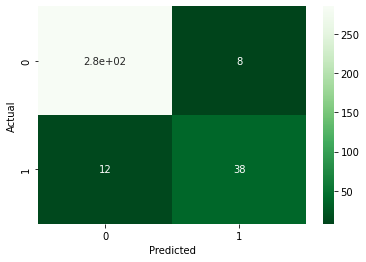

number of support vectors in combination of 22 , 1 , 4 for each class is: [130 123]
it is the run for testing set is 4


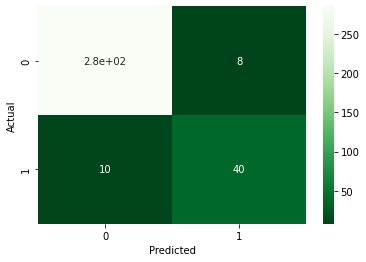

number of support vectors in combination of 22 , scale , 1 for each class is: [145 123]
it is the run for testing set is 4


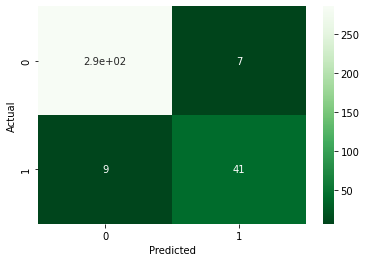

number of support vectors in combination of 22 , scale , 2 for each class is: [138 112]
it is the run for testing set is 4


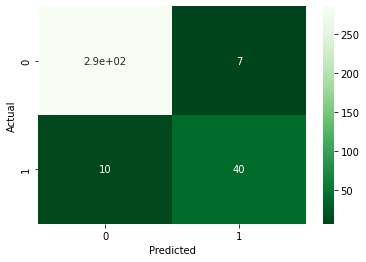

number of support vectors in combination of 22 , scale , 4 for each class is: [134 106]
it is the run for testing set is 4


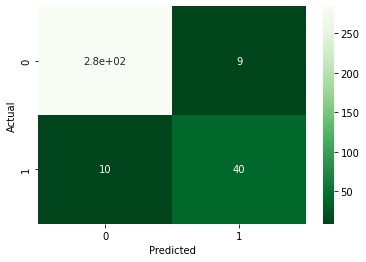

number of support vectors in combination of 24 , 0.5 , 1 for each class is: [200 198]
it is the run for testing set is 4


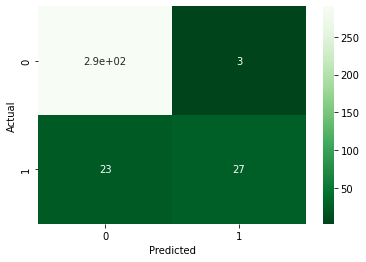

number of support vectors in combination of 24 , 0.5 , 2 for each class is: [181 176]
it is the run for testing set is 4


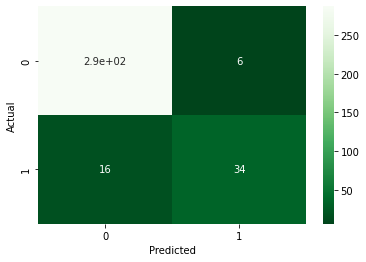

number of support vectors in combination of 24 , 0.5 , 4 for each class is: [159 155]
it is the run for testing set is 4


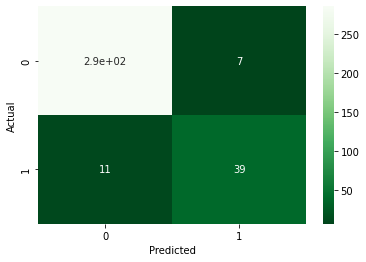

number of support vectors in combination of 24 , 1 , 1 for each class is: [181 177]
it is the run for testing set is 4


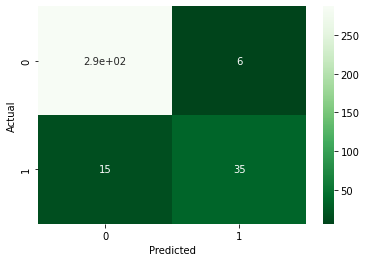

number of support vectors in combination of 24 , 1 , 2 for each class is: [162 157]
it is the run for testing set is 4


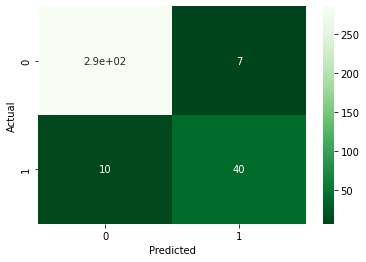

number of support vectors in combination of 24 , 1 , 4 for each class is: [142 138]
it is the run for testing set is 4


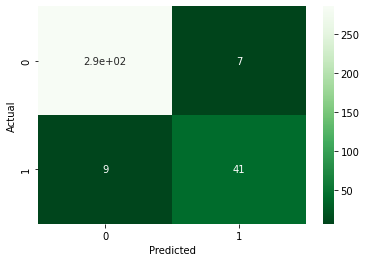

number of support vectors in combination of 24 , scale , 1 for each class is: [153 134]
it is the run for testing set is 4


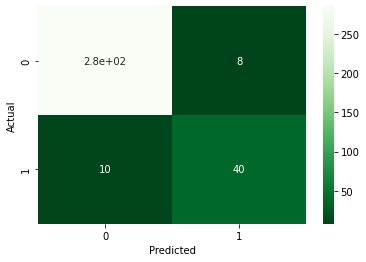

number of support vectors in combination of 24 , scale , 2 for each class is: [146 121]
it is the run for testing set is 4


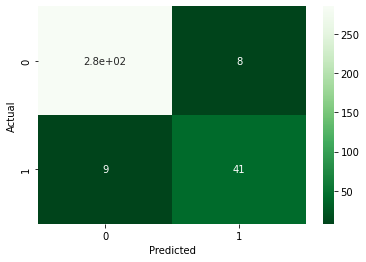

number of support vectors in combination of 24 , scale , 4 for each class is: [143 118]
it is the run for testing set is 4


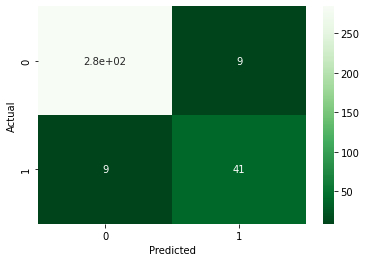

your maximum MCC is 0.8851959754015535
the combination for maximum MCC is:
the related combination is:


In [141]:
#calculating the first 20 compostion 

result_k=[]
result_G=[]
result_c=[]
result_clas=[]
MCC_List=[]
Precision_List=[]
Recall_List=[]
F1_List=[]
Q2_List=[]
AVG_MCC=[]
Standard_Error=[]

CLASSES=[0,1,2,3,4]
K=[20,22,24]
gamma=[0.5,1,'scale']
C=[1,2,4]
aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
for clas in CLASSES:
    MCC_List_mean=[]
    MCC_List_mean.append(MCC)
    AVG_MCC.append(mean(MCC_List_mean))
    for k in K:
        for G in gamma:
            for c in C:

                # d={'a':0,'b':0,'g':0,'d':0,'c':0}
                bb=[]
                pd_tr['residues']=pd_tr.apply(lambda x: x['Sequence (first 50 N-terminal residues)'][:k], axis=1)
                for j in pd_tr['residues']:
                    for i in aa:
                        bb.append((len(re.findall(i,j))/len(j)))
                df_bbb = pd.DataFrame(np.array(bb).reshape(len( pd_tr['residues']),20), pd_tr['residues'])
                #adding two columns of main dataframe to new dataframe
                df_bbb[['Cross-validation fold','Class']]=pd_tr[['Cross-validation fold','Class']].values
                # df_bbb.iloc[:,0:20]
                #convert class to label of +1 and 0
                df_bbb['binary_representation']=np.where(df_bbb['Class'] =='SP' , 1 , 0)

                #train x on 1,2,3,4 / test on 0
                #k considered 20 

                mySVC = svm.SVC(C=c, kernel='rbf', gamma=G)
                X = df_bbb.iloc[:,0:20].loc[df_bbb['Cross-validation fold']!=clas]
                y = df_bbb.iloc[:,22:23].loc[df_bbb['Cross-validation fold']!=clas]
                mySVC.fit(X, y)
                #getting support vectors
                sv = mySVC.support_vectors_
                # Print the number of support vectors for each class
                print(f'number of support vectors in combination of {k} , {G} , {c} for each class is: {mySVC.n_support_}')
                print(f'it is the run for testing set is {clas}')
                # # Getting decision function values on testdata
                X_test= df_bbb.iloc[:,0:20].loc[df_bbb['Cross-validation fold']==clas]
                #desicion function
                DF = mySVC.predict(X_test)
                data = {'y_Actual':  df_bbb.loc[:,'binary_representation'].loc[df_bbb['Cross-validation fold']==clas].tolist() ,
                        'y_Predicted': DF
                        }
                df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
                confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
                sn.heatmap(confusion_matrix, annot=True,cmap="Greens_r")
                plt.show()
                MCC=matthews_corrcoef(df_bbb.loc[:,'binary_representation'].loc[df_bbb['Cross-validation fold']==clas].tolist(), DF)
                PRECISION=precision_score(df_bbb.loc[:,'binary_representation'].loc[df_bbb['Cross-validation fold']==clas].tolist(), DF)
                RECALL=recall_score(df_bbb.loc[:,'binary_representation'].loc[df_bbb['Cross-validation fold']==clas].tolist(), DF)
                F1=f1_score(df_bbb.loc[:,'binary_representation'].loc[df_bbb['Cross-validation fold']==clas].tolist(), DF)
                ACC=accuracy_score(df_bbb.loc[:,'binary_representation'].loc[df_bbb['Cross-validation fold']==clas].tolist(), DF)
                Standard_error=np.std(DF)
                MCC_List.append(MCC)
                Precision_List.append(PRECISION)
                Recall_List.append(RECALL)
                F1_List.append(F1)
                Q2_List.append(ACC)
                result_k.append(k)
                result_G.append(G)
                result_c.append(c)
                result_clas.append(clas)
                Standard_Error.append(Standard_error)
                
print(f'your maximum MCC is {max(MCC_List)}')
print('the combination for maximum MCC is:')
# print(f'the list of resulted MCC is {MCC_List}')
print('the related combination is:')





In [97]:
df_bbb.iloc[:,0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
residues,,,,,,,,,,,,,,,,,,,,
MRFLAATFLLLALSTAAQAEPVQF,0.000000,0.250000,0.041667,0.041667,0.208333,0.000000,0.041667,0.125000,0.000000,0.000000,0.041667,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.041667,0.000000,0.041667
MAGKEVIFIMALFIAVESSPIFSF,0.041667,0.125000,0.083333,0.041667,0.041667,0.166667,0.083333,0.166667,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.041667,0.000000
MRVFLAICLSLTVALAAETGKYTP,0.041667,0.166667,0.083333,0.041667,0.166667,0.041667,0.041667,0.041667,0.000000,0.041667,0.041667,0.125000,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.041667
MASSSAKILLPLSLLFTLLSLSQS,0.000000,0.083333,0.000000,0.041667,0.333333,0.041667,0.041667,0.041667,0.000000,0.000000,0.291667,0.041667,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000
MNYLVMISLALLLMIGVESVRDGY,0.083333,0.041667,0.125000,0.000000,0.208333,0.083333,0.125000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MPVQVLKIIKGKPETQLPSHLQRE,0.041667,0.000000,0.083333,0.125000,0.125000,0.083333,0.041667,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.125000,0.041667,0.000000,0.083333,0.125000,0.041667
MSKFLDMLSGSQCVSLEKCGDVVV,0.083333,0.000000,0.166667,0.000000,0.125000,0.000000,0.083333,0.041667,0.000000,0.000000,0.166667,0.000000,0.083333,0.000000,0.041667,0.000000,0.083333,0.041667,0.083333,0.000000
MAAVYSGISLKLKSKTTSWEDKLK,0.041667,0.083333,0.041667,0.000000,0.125000,0.041667,0.041667,0.000000,0.041667,0.041667,0.166667,0.083333,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.208333,0.000000


In [142]:

pd_result=pd.DataFrame(list(zip(result_k, result_G, result_c,result_clas,MCC_List,Precision_List,Recall_List,F1_List,Q2_List,Standard_Error)),columns=['k','G', 'c','clas','MCC','Precision','Recall','F1_Score','Q2','Stdv'])
pd_result
pd_result.to_excel('svm_compositions.xlsx')


In [145]:
statistic_list=['MCC','Q2','Precision','Recall','F1_Score','Stdv']
average_statistic_SVM=[]
for i in range(len(statistic_list)):
  average_statistic_SVM.append(max(pd_result.groupby(['k','G','c'])[statistic_list[i]].mean()))
dars='SVM Average Statistic Results'
pd.DataFrame(data=average_statistic_SVM, index=statistic_list, columns=[dars])


# print('the max value between all of average MCC is: ')
# print('the best combination is :  ')
# print('c=2 , G=scale , k=20')

,SVM Average Statistic Results
MCC,0.840491
Q2,0.959380
Precision,0.918733
Recall,0.852923
F1_Score,0.863403
Stdv,0.353599


In [100]:
#problem may be msitake
#maximum of MCC
Max_MCC=max(pd_result['MCC'])
print(f'the maximum MCC value is:{ Max_MCC }')
# finding the combination of maximum MCC 
combination=pd_result[pd_result['MCC']==pd_result['MCC'].max()]
print(f'the combination related to max value of MCC is:\n \n {combination } \n')
#AVERAGE OF MCC

mean(MCC_List)
print(f'the Average of MCC value is:{ mean(MCC_List) }')

the maximum MCC value is:0.8851959754015535
the combination related to max value of MCC is:
 
      k      G  c  clas       MCC  Precision    Recall  F1_Score        Q2
61  20  scale  2     2  0.885196       0.92  0.884615  0.901961  0.971014 

the Average of MCC value is:0.7745872415032807


In [101]:
# finding max score based on prediciton matrix(overall prediction matrix)

### saving the new model

In [295]:
#import the pickle and svm modules

mySVC = svm.SVC(C=2, kernel='rbf', gamma='scale')
X_train = df_bbb.iloc[:,0:20]
y_train = df_bbb.iloc[:,22:23]
mySVC.fit(X_train, y_train)
# Save the model to file ‘myModel.pkl’ using pickle
pickle.dump(mySVC, gzip.open('myModel.pkl.gz', 'w'))

In [296]:
#calculating the first 20 compostion 

aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
pdbm=[]
pd_BM['signal_peptide_residue_basedon_20']=pd_BM.apply(lambda x: x['Sequence (first 50 N-terminal residues)'][:20], axis=1)
for j in pd_BM['signal_peptide_residue_basedon_20']:
    for i in aa:
        pdbm.append((len(re.findall(i,j))/len(j)))
pd_bmm = pd.DataFrame(np.array(pdbm).reshape(len(pd_BM['signal_peptide_residue_basedon_20']),20),index=pd_BM['signal_peptide_residue_basedon_20'])
pd_bmm['binary_representation']=pd_BM['binary representation'].values
# pd_bmm

In [297]:
pd_bmm['UniProtKB accession']=pd_BM['UniProtKB accession'].values
pd_bmm

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,binary_representation,UniProtKB accession
signal_peptide_residue_basedon_20,,,,,,,,,,,,,,,,,,,,,
MAPTLFQKLFSKRTGLGAPG,0.15,0.10,0.00,0.10,0.15,0.00,0.05,0.10,0.00,0.00,...,0.00,0.00,0.05,0.00,0.00,0.00,0.10,0.05,0,Q8TF40
MDFTSLETTTFEEVVIALGS,0.05,0.05,0.10,0.00,0.10,0.05,0.05,0.10,0.00,0.00,...,0.00,0.00,0.00,0.00,0.05,0.15,0.00,0.00,0,Q1ENB6
MPNPRPGKPSAPSLALGPSP,0.10,0.10,0.00,0.35,0.10,0.00,0.05,0.00,0.00,0.00,...,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.05,0,Q9BZS1
MFAVSIVPRTTSCRLSSAFL,0.00,0.10,0.10,0.05,0.10,0.05,0.05,0.10,0.00,0.00,...,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0,F4K2A1
MMDNEVLDFDIGVGVSSGGD,0.20,0.00,0.15,0.00,0.05,0.05,0.10,0.05,0.00,0.00,...,0.00,0.05,0.00,0.00,0.20,0.05,0.00,0.00,0,Q9SZL8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSGYSPLSSGPADVHIGKAG,0.20,0.10,0.05,0.10,0.05,0.05,0.05,0.00,0.00,0.05,...,0.00,0.00,0.00,0.05,0.05,0.00,0.05,0.00,0,O74327
MSTMFADTLLIVFISVCTAL,0.00,0.10,0.10,0.00,0.15,0.10,0.10,0.10,0.00,0.00,...,0.05,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0,Q9UM00
MELFALLIKVAGLLATVTVG,0.10,0.15,0.15,0.00,0.25,0.05,0.05,0.05,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.00,0,Q93Y07


## Testing

the MCC is: 0.7466071391313982 
 the precision is: 0.8766233766233766 
 the recall is: 0.645933014354067 
 the f1 socre is: 0.7438016528925622 
 the accuracy is: 0.9875268240343348


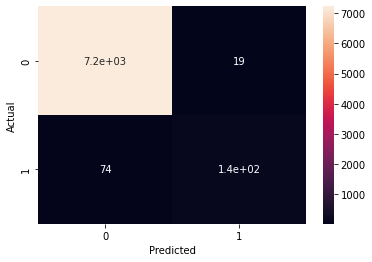

In [298]:
mySVC=pickle.load(gzip.open('myModel.pkl.gz','r'))

x = pd_bmm.iloc[:,0:20]
y = pd_bmm.iloc[:,20:21]

mySVC.fit(x,y)
y_pred_SVM = mySVC.predict(x)
y_Actual_SVM=pd_BM.loc[:,'binary representation']

data = {'y_Actual':  y_Actual_SVM  ,
        'y_Predicted': y_pred_SVM
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

MCC=matthews_corrcoef(y_Actual_SVM,y_pred_SVM)
Precision=precision_score(y_Actual_SVM,y_pred_SVM)
Recall=recall_score(y_Actual_SVM,y_pred_SVM)
F1_Score=f1_score(y_Actual_SVM,y_pred_SVM)
Q2=accuracy_score(y_Actual_SVM,y_pred_SVM)
statistics_BM_SVM=[MCC,Precision,Recall,F1_Score,Q2]
print(f'the MCC is: {MCC} \n the precision is: {Precision} \n the recall is: {Recall} \n the f1 socre is: {F1_Score} \n the accuracy is: {Q2}')
sn.heatmap(confusion_matrix, annot=True)
plt.show()


In [235]:
TN_SVM=confusion_matrix[0][0]
FP_SVM=confusion_matrix[1][0]

In [236]:

comparison_df_SVM= pd.DataFrame({'IDS':pd_BM.loc[:,'UniProtKB accession'].tolist(),'predicted_class': y_pred_SVM.tolist(),'actual_class':pd_BM.loc[:,'binary representation'].tolist()}) 
comparison_df_SVM


,IDS,predicted_class,actual_class
0,Q8TF40,0,0
1,Q1ENB6,0,0
2,Q9BZS1,0,0
3,F4K2A1,0,0
4,Q9SZL8,0,0
...,...,...,...
7451,O74327,0,0
7452,Q9UM00,1,0
7453,Q93Y07,1,0
7454,Q86TL2,0,0


# Results

## Extracting IDs of FP , TN , FN , TP for SVM 

In [237]:
# Extracting IDS which are FP SVM
FP_BM_SVM=comparison_df_SVM['IDS'][(comparison_df_SVM['predicted_class']==1) & (comparison_df_SVM['actual_class']==0)].tolist()
FP_SVM=pd.DataFrame(FP_BM_SVM)
FP_SVM.to_excel('FP_SVM.xlsx')
# Extracting IDs which are TN SVM
TN_BM_SVM=(comparison_df_SVM['IDS'][(comparison_df_SVM['predicted_class']==0) & (comparison_df_SVM['actual_class']==0)].tolist())
TN_SVM=pd.DataFrame(TN_BM_SVM)
TN_SVM.to_excel('TN_SVM.xlsx')
# Extracting IDS which are FN SVM
FN_BM_SVM=comparison_df_SVM['IDS'][(comparison_df_SVM['predicted_class']==0) & (comparison_df_SVM['actual_class']==1)].tolist()
FN_SVM=pd.DataFrame(FN_BM_SVM)
FN_SVM.to_excel('FN_SVM.xlsx')
# Extracting IDS which are TP SVM
TP_BM_SVM=comparison_df_SVM['IDS'][(comparison_df_SVM['predicted_class']==1) & (comparison_df_SVM['actual_class']==1)].tolist()
TP_SVM=pd.DataFrame(TP_BM_SVM)
TP_SVM.to_excel('TP_SVM.xlsx')



## Extracting IDs of FP , TN , FN , TP for HJ

In [238]:
# Extracting IDS which are FP HJ
FP_BM_HJ=comparison_df_HJ['IDS'][(comparison_df_HJ['predicted_class']==1) & (comparison_df_HJ['actual_class']==0)].tolist()
FP_HJ=pd.DataFrame(FP_BM_HJ)
FP_HJ.to_excel('FP_HJ.xlsx')
# Extracting IDs which are TN HJ
TN_BM_HJ=(comparison_df_HJ['IDS'][(comparison_df_HJ['predicted_class']==0) & (comparison_df_HJ['actual_class']==0)].tolist())
TN_HJ=pd.DataFrame(TN_BM_HJ)
TN_HJ.to_excel('TN_HJ.xlsx')
# Extracting IDS which are FN HJ
FN_BM_HJ=comparison_df_HJ['IDS'][(comparison_df_HJ['predicted_class']==0) & (comparison_df_HJ['actual_class']==1)].tolist()
FN_HJ=pd.DataFrame(FN_BM_HJ)
FN_HJ.to_excel('FN_HJ.xlsx')
# Extracting IDS which are TP HJ
TP_BM_HJ=comparison_df_HJ['IDS'][(comparison_df_HJ['predicted_class']==1) & (comparison_df_HJ['actual_class']==1)].tolist()
TP_HJ=pd.DataFrame(TP_BM_HJ)
TP_HJ.to_excel('TP_HJ.xlsx')


## FP Analysis

### Overall FPR 

In [242]:
# FPR Overall (BM dataset) SVM
FPR_SVM=len(FP_SVM)/(len(FP_SVM)+len(TN_SVM))
FPR_SVM

0.0026217745273906445

In [241]:
# FPR Overall (BM dataset) HJ
FPR_HJ=len(FP_HJ)/(len(FP_HJ)+len(TN_HJ))
FPR_HJ

0.022492065682351316

### FPR TM -SVM

In [ ]:
# TN (Transmembrane + ECO codes + lenght<50)
tsv_list=['TN_SVM.tsv','FP_SVM.tsv']

for i in tsv_list:
    pd=pd.read_csv(i,sep='\t')
    # pd_TN_BMM=pd_TN_BM.fillna('0')
    lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
    pd1=pd[(pd['Transmembrane'].str.contains('TRANSMEM', na=False))& (pd['Transmembrane'].apply(lambda val: any(s in str(val) for s in lst)))]
    # checking len<50
    TN_list_trans_eco=[]
    for i in range(len(pd)):
      x=re.search("(:?\.\.)(\d+)",pd['Transmembrane'].iloc[i])
      if int(x.group(2)) <51:
        TN_list_trans_eco.append(pd['From'].iloc[i])
    TN_list_trans_eco

    
    
    
    

In [271]:
# TN (Transmembrane + ECO codes + lenght<50)

pd_TN_SVM=pd.read_csv('TN_SVM.tsv',sep='\t')
# pd_TN_BMM=pd_TN_BM.fillna('0')
lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
pd_TN_SVM=pd_TN_SVM[(pd_TN_SVM['Transmembrane'].str.contains('TRANSMEM', na=False))& (pd_TN_SVM['Transmembrane'].apply(lambda val: any(s in str(val) for s in lst)))]


# len<50
TN_SVM_TM=[]
for i in range(len(pd_TN_SVM)):
  x=re.search("(:?\.\.)(\d+)",pd_TN_SVM['Transmembrane'].iloc[i])
  if int(x.group(2)) <51:
    TN_SVM_TM.append(pd_TN_SVM['From'].iloc[i])
TN_SVM_TM
len(TN_SVM_TM)



130

In [263]:
# FP (Transmembrane + ECO codes + lenght<50)

pd_FP_SVM=pd.read_csv('FP_SVM.tsv',sep='\t')
# pd_TN_BMM=pd_TN_BM.fillna('0')
lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
pd_FP_SVM=pd_FP_SVM[(pd_FP_SVM['Transmembrane'].str.contains('TRANSMEM', na=False))& (pd_FP_SVM['Transmembrane'].apply(lambda val: any(s in str(val) for s in lst)))]


# len<50
FP_SVM_TM=[]
for i in range(len(pd_FP_SVM)):
  x=re.search("(:?\.\.)(\d+)",pd_FP_SVM['Transmembrane'].iloc[i])
  if int(x.group(2)) <51:
    FP_SVM_TM.append(pd_FP_SVM['From'].iloc[i])
FP_SVM_TM
len(FP_SVM_TM)

11

In [264]:
FPR_TM_SVM=len(FP_SVM_TM)/(len(FP_SVM_TM)+len(TN_SVM_TM))
FPR_TM_SVM

0.07801418439716312

### FPR TM- HJ

In [265]:
# TN (Transmembrane + ECO codes + lenght<50)

pd_TN_HJ=pd.read_csv('TN_HJ.tsv',sep='\t')
# pd_TN_BMM=pd_TN_BM.fillna('0')
lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
pd_TN_HJ=pd_TN_HJ[(pd_TN_HJ['Transmembrane'].str.contains('TRANSMEM', na=False))& (pd_TN_HJ['Transmembrane'].apply(lambda val: any(s in str(val) for s in lst)))]


# len<50
TN_HJ_TM=[]
for i in range(len(pd_TN_HJ)):
  x=re.search("(:?\.\.)(\d+)",pd_TN_HJ['Transmembrane'].iloc[i])
  if int(x.group(2)) <51:
    TN_HJ_TM.append(pd_TN_HJ['From'].iloc[i])
TN_HJ_TM
len(TN_HJ_TM)


103

In [266]:
# FP (Transmembrane + ECO codes + lenght<50)

pd_FP_HJ=pd.read_csv('FP_HJ.tsv',sep='\t')
# pd_TN_BMM=pd_TN_BM.fillna('0')
lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
pd_FP_HJ=pd_FP_HJ[(pd_FP_HJ['Transmembrane'].str.contains('TRANSMEM', na=False))& (pd_FP_HJ['Transmembrane'].apply(lambda val: any(s in str(val) for s in lst)))]


# len<50
FP_HJ_TM=[]
for i in range(len(pd_FP_HJ)):
  x=re.search("(:?\.\.)(\d+)",pd_FP_HJ['Transmembrane'].iloc[i])
  if int(x.group(2)) <51:
    FP_HJ_TM.append(pd_FP_HJ['From'].iloc[i])
FP_HJ_TM
len(FP_HJ_TM)


38

In [267]:
FPR_TM_HJ=len(FP_HJ_TM)/(len(FP_HJ_TM)+len(TN_HJ_TM))
FPR_TM_HJ

0.2695035460992908

### FPR (TPeptide)-SVM

In [283]:
# FPR Transmembrane SVM (BM dataset)(should have properties of Transmembrane,'0000269', '0000303','0000305','0000250','0000255','0000312','0007744' lenght <50

pd_TN_SVM=pd.read_csv('TN_SVM.tsv',sep='\t')
# pd_TN_BMM=pd_TN_BM.fillna('0')
lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
TRANSIT_TN_SVM=pd_TN_SVM[(pd_TN_SVM['Transit peptide'].str.contains('TRANSIT', na=False))& (pd_TN_SVM['Transit peptide'].apply(lambda val: any(s in str(val) for s in lst)))]



In [288]:
# FPR TransPeptide SVM (BM dataset)(should have properties of Transmembrane,'0000269', '0000303','0000305','0000250','0000255','0000312','0007744'

pd_FP_SVM=pd.read_csv('FP_SVM.tsv',sep='\t')
# pd_TN_BMM=pd_TN_BM.fillna('0')
lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
TRANSIT_FP_SVM=pd_FP_SVM[(pd_FP_SVM['Transit peptide'].str.contains('TRANSIT', na=False))& (pd_FP_SVM['Transit peptide'].apply(lambda val: any(s in str(val) for s in lst)))]




In [290]:
FPR_Transid_SVM=len(TRANSIT_FP_SVM)/(len(TRANSIT_FP_SVM)+len(TRANSIT_TN_SVM))
FPR_Transid_SVM

0.0014958863126402393

### FPR (TPeptide)-HJ

In [291]:
# FPR Transmembrane SVM (BM dataset) (should have properties of Transmembrane,'0000269', '0000303','0000305','0000250','0000255','0000312','0007744')


pd_TN_HJ=pd.read_csv('TN_HJ.tsv',sep='\t')
# pd_TN_BMM=pd_TN_BM.fillna('0')
lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
TRANSIT_TN_HJ=pd_TN_HJ[(pd_TN_HJ['Transit peptide'].str.contains('TRANSIT', na=False))& (pd_TN_HJ['Transit peptide'].apply(lambda val: any(s in str(val) for s in lst)))]






In [292]:
# FPR TransPeptide SVM (BM dataset)(should have properties of Transmembrane,'0000269', '0000303','0000305','0000250','0000255','0000312','0007744', 

pd_FP_HJ=pd.read_csv('FP_HJ.tsv',sep='\t')
# pd_TN_BMM=pd_TN_BM.fillna('0')
lst=['0000269', '0000303','0000305','0000250','0000255','0000312','0007744']
TRANSIT_FP_HJ=pd_FP_HJ[(pd_FP_HJ['Transit peptide'].str.contains('TRANSIT', na=False))& (pd_FP_HJ['Transit peptide'].apply(lambda val: any(s in str(val) for s in lst)))]




In [294]:
FPR_Transid_HJ=len(TRANSIT_FP_HJ)/(len(TRANSIT_FP_HJ)+len(TRANSIT_TN_HJ))
FPR_Transid_HJ

0.0344053851907255

## FN Analysis


In [ ]:
# For the von-Heijne method, FNs may be due to a different composition of the cleavage-site context than expected 
# / For all FN in the benchmark, we can compute the corresponding LOGO and compare it with the
# expected one

# For the SVM method: FN may be due to a different composition of the N-terminal region (with the selected K) than
# expected / FN may be due to the presence of a longer/shorter SP than expected


### FN VH (Tr dataset)

In [ ]:
# Training dataset logo (TP)-HJ

In [ ]:
# Training dataset logo (TP)-SVM

In [ ]:
# Training dataset logo (FN)-HJ

In [ ]:
# Training dataset logo (FN)-SVM

### FN SVM (BM dataset)

In [ ]:
# Benchmark dataset distribution Lenght SP(TP)-HJ

In [ ]:
# Benchmark dataset distribution Lenght SP(TP)-SVM

In [189]:
# Benchmark dataset distribution Lenghth SP(FN)-HJ

In [ ]:
# Benchmark dataset distribution Lenghth SP(FN)-SVM

## Comparison of SVM & vonHijne

### Table1 : Cross-Validation Results

In [185]:
statistic_list=['MCC','Q2','Precision','Recall','F1_Score']
pd.DataFrame(list(zip(mean_statistics_HJ,average_statistic_SVM)),columns=['HJ','SVM'],index=statistic_list)

,HJ,SVM
MCC,0.783018,0.840491
Q2,0.946613,0.959380
Precision,0.862694,0.918733
Recall,0.767538,0.852923
F1_Score,0.811931,0.863403


### **Table2: Benchmark Results**

In [186]:
statistic_list=['MCC','Q2','Precision','Recall','F1_Score']
pd.DataFrame(list(zip(statistics_BM_HJ,statistics_BM_SVM)),columns=['HJ','SVM'],index=statistic_list)

,HJ,SVM
MCC,0.590458,0.746607
Q2,0.489028,0.876623
Precision,0.746411,0.645933
Recall,0.590909,0.743802
F1_Score,0.971030,0.987527
